<center>
<h1><b>Lab 9</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>October 29, 2020</b></h3>
<hr>
</center>

# Problem 1
The first starter program provided for this lab, ```montecarlo.py```, performs Monte Carlo integration of a simple function, $f(x)=√4−x2$ (by default). Use the code (or the Matlab version ```montecarlo.m```, or your own equivalent program) to integrate this $f(x)$ from $x = 0$ to $2$, and thus compute $\pi$ numerically, to 3, 4, and 5 significant digits. Observe how the average error (standard error of the mean) decreases as a function of the total number $N$ of random numbers used ($N =$ numbers generated per trial times the number of trials). Then, try to compute via Monte Carlo the following two integrals:

- $\int_{-2}^2\frac{dx}{\sqrt{4−x^2}}$
and
- $\int_0^{\infty}e^{-x}\ln{x}dx$.

Take care to handle any divergences in the integrand as well as the range of integration extending to infinity.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from IPython.display import display, Math
from numpy.polynomial import Polynomial
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [23]:
_sample_size = 1000
_sampling_size = 1000
_nbins = _sampling_size // 10

In [3]:
def MCInt(f, x_i, x_f, sample_size, *args, **kwargs):
    rng = np.random.default_rng()
    f = np.vectorize(f)
    sample = rng.uniform(size=sample_size, low=x_i, high=x_f)
    sampled_values = f(sample)
    return np.sum(sampled_values) * ((x_f - x_i) / sample.size)


def MCInt_binned(f, x_i, x_f, sample_size, sampling_size, nbins, *args, **kwargs):
    rng = np.random.default_rng()
    f = np.vectorize(f)
    sampling_data = np.zeros((sampling_size, ))
    
    for _ in tqdm(range(sampling_size)):
        sample = rng.uniform(size=sample_size, low=x_i, high=x_f)
        sampled_values = f(sample)
        sampling_data[_] = np.sum(sampled_values) * ((x_f - x_i) / sample.size)
    
    bins = np.linspace(np.min(sampling_data), np.max(sampling_data), nbins)    
    return sampling_data, bins

In [4]:
f1 = np.vectorize(lambda x : np.power(4 - x ** 2, -0.5))
f2a = np.vectorize(lambda x : np.exp(-x) * np.log(x))
f2b = np.vectorize(lambda x : np.exp(-np.tan(x))*np.log(np.tan(x))*np.power(np.cos(x), -2))

### Part A

In [5]:
x_i, x_f = -2.0, 2.0
x = np.linspace(x_i, x_f, _sample_size)

<ipython-input-4-f54e83477492>:1: RuntimeWarning: divide by zero encountered in power
  f1 = np.vectorize(lambda x : np.power(4 - x ** 2, -0.5))
C:\Users\ethan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
<ipython-input-4-f54e83477492>:1: RuntimeWarning: divide by zero encountered in power
  f1 = np.vectorize(lambda x : np.power(4 - x ** 2, -0.5))
C:\Users\ethan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)


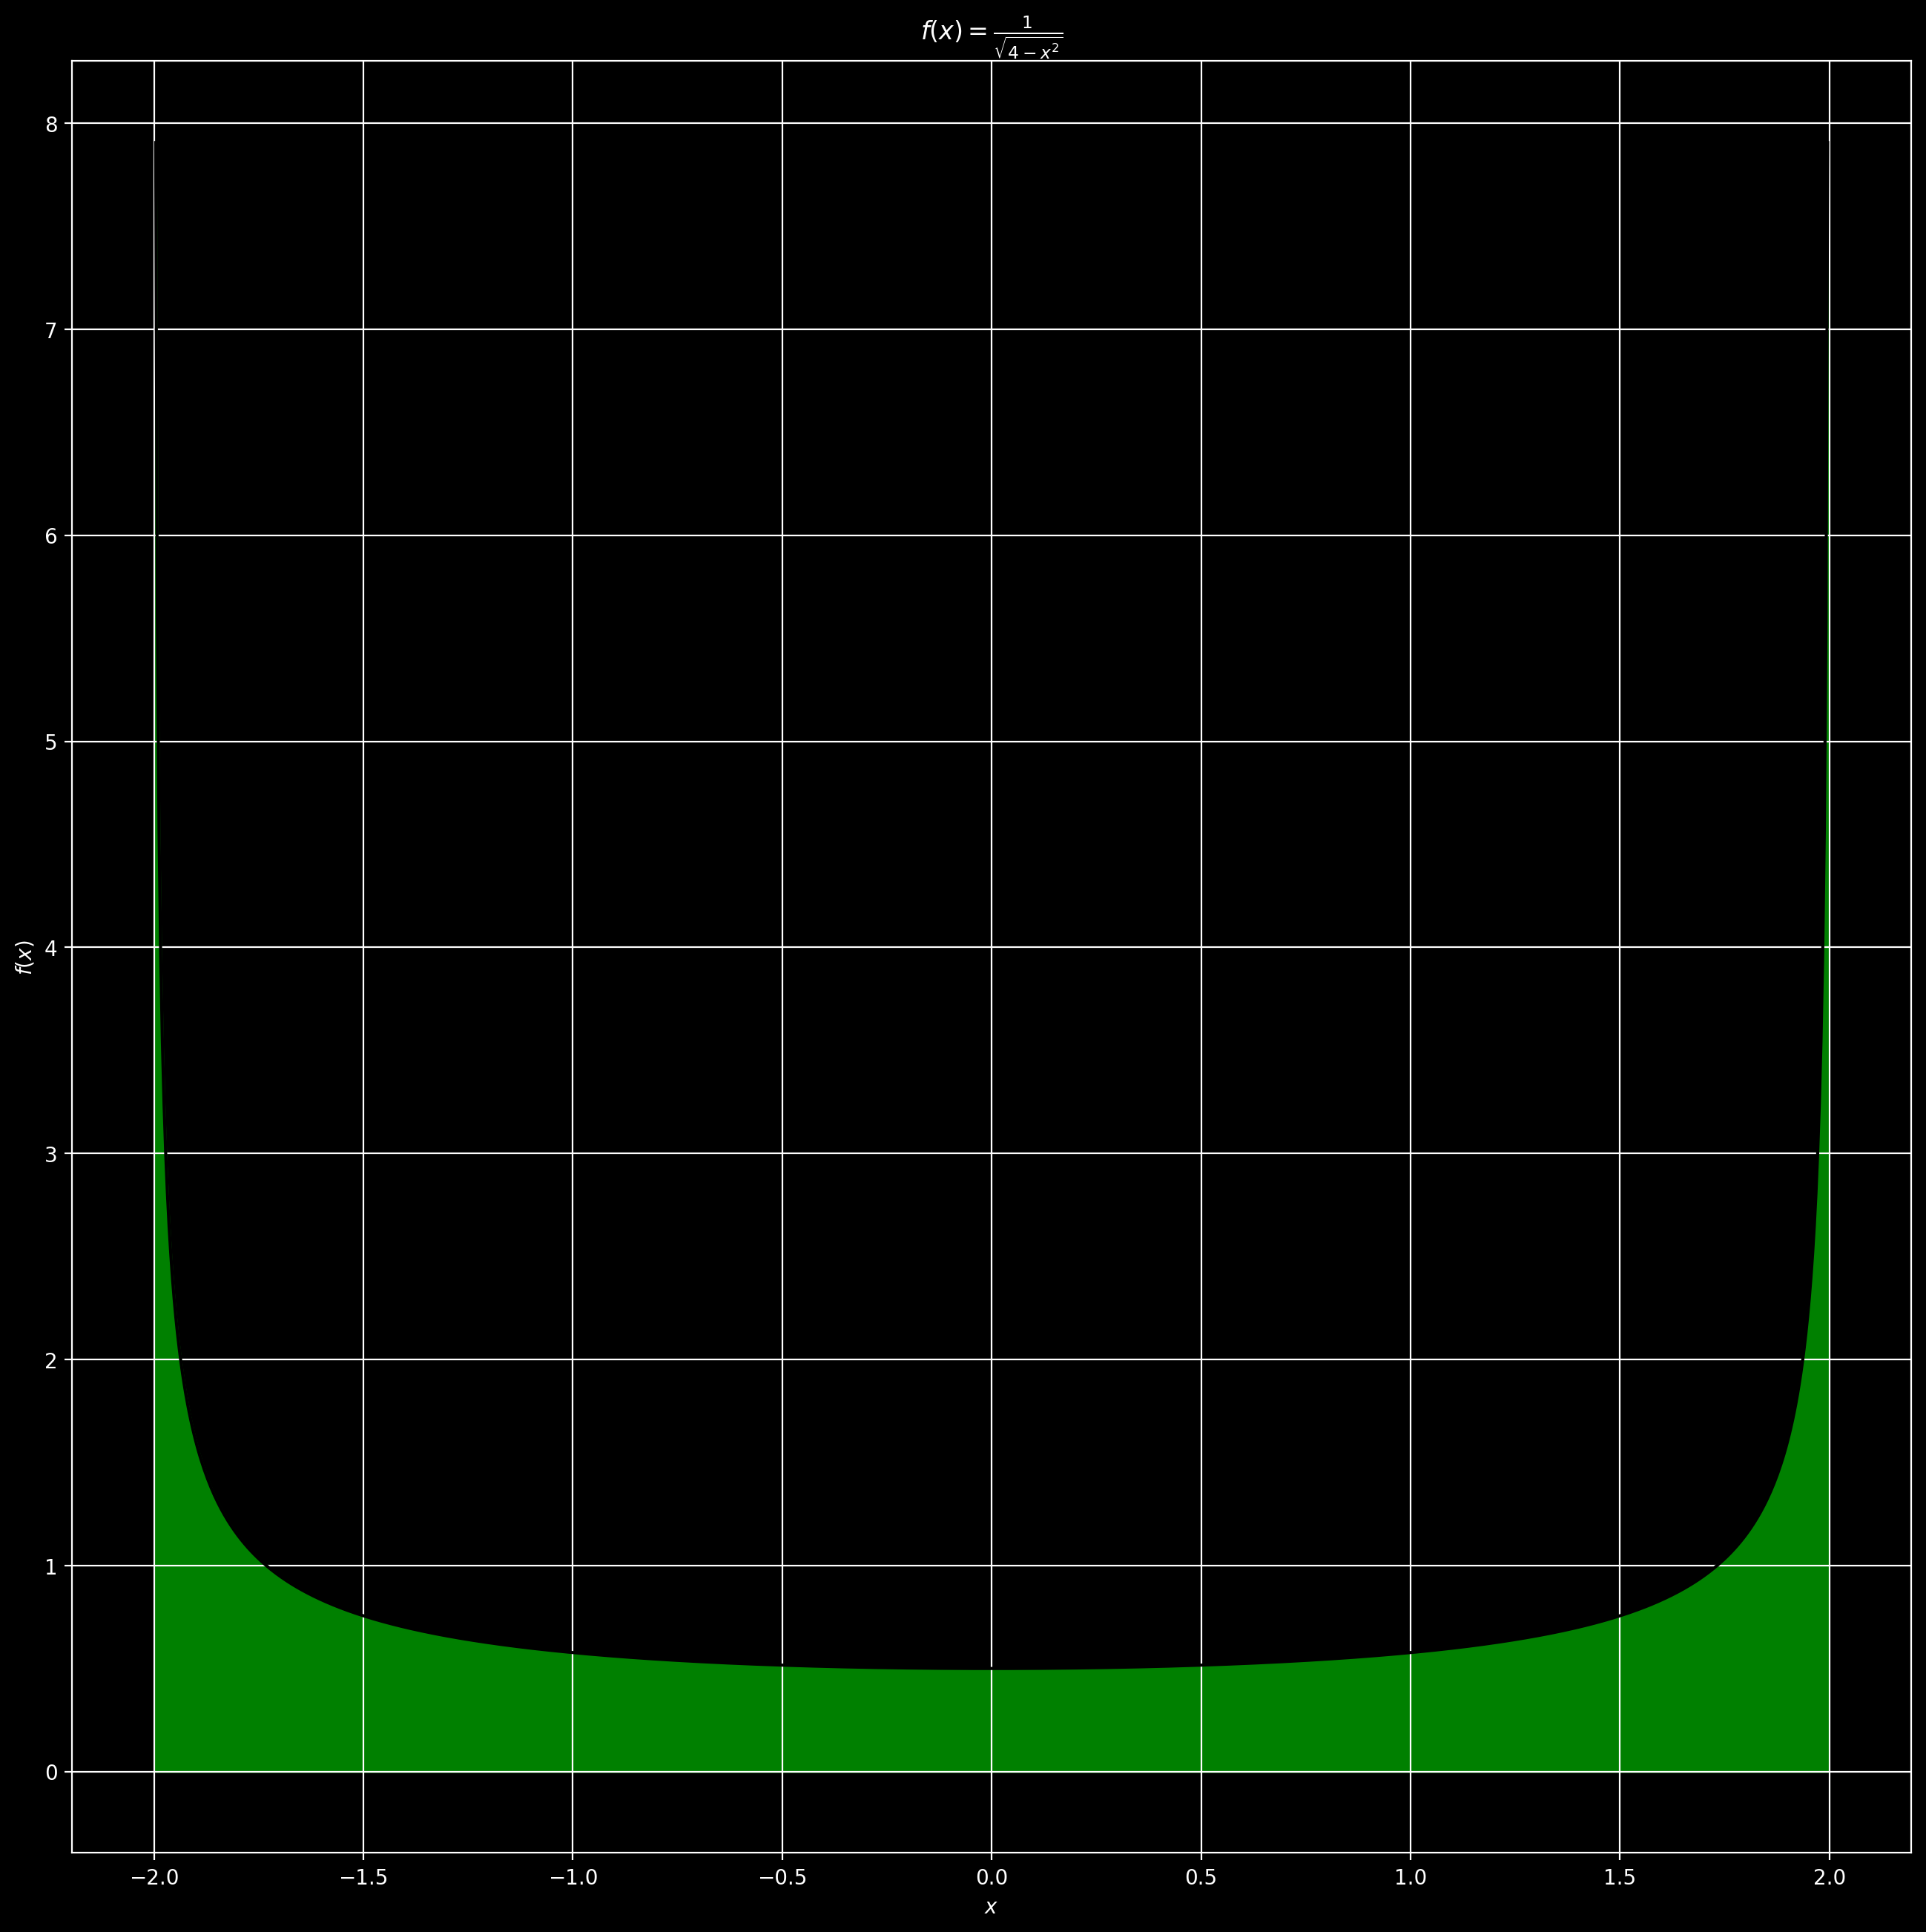

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)

ax.plot(x, f1(x), c='k')
ax.fill_between(x, f1(x), color='g')

ax.set_title(r'$f(x)=\frac{1}{\sqrt{4-x^2}}$')
ax.set_ylabel(r'$f(x)$')
ax.set_xlabel(r'$x$')
ax.grid()

plt.savefig('plots/P1a_function_plot.png')

In [7]:
I1, bins1 = MCInt_binned(f1, -2, 2, _sample_size, _sampling_size, _nbins)
ans = np.pi
mean = np.mean(I1)
std = np.std(I1)

100%|██████████| 1000/1000 [00:16<00:00, 60.00it/s]


In [8]:
display(Math(fr'\mu\approx\bar{{x}}={mean:0.6f}\\s={std:0.6f}\\\sigma={std/np.sqrt(_sampling_size):0.4f}\\\text{{Error}}={100*(mean-ans)/ans:0.6f}\,\%'))

<IPython.core.display.Math object>

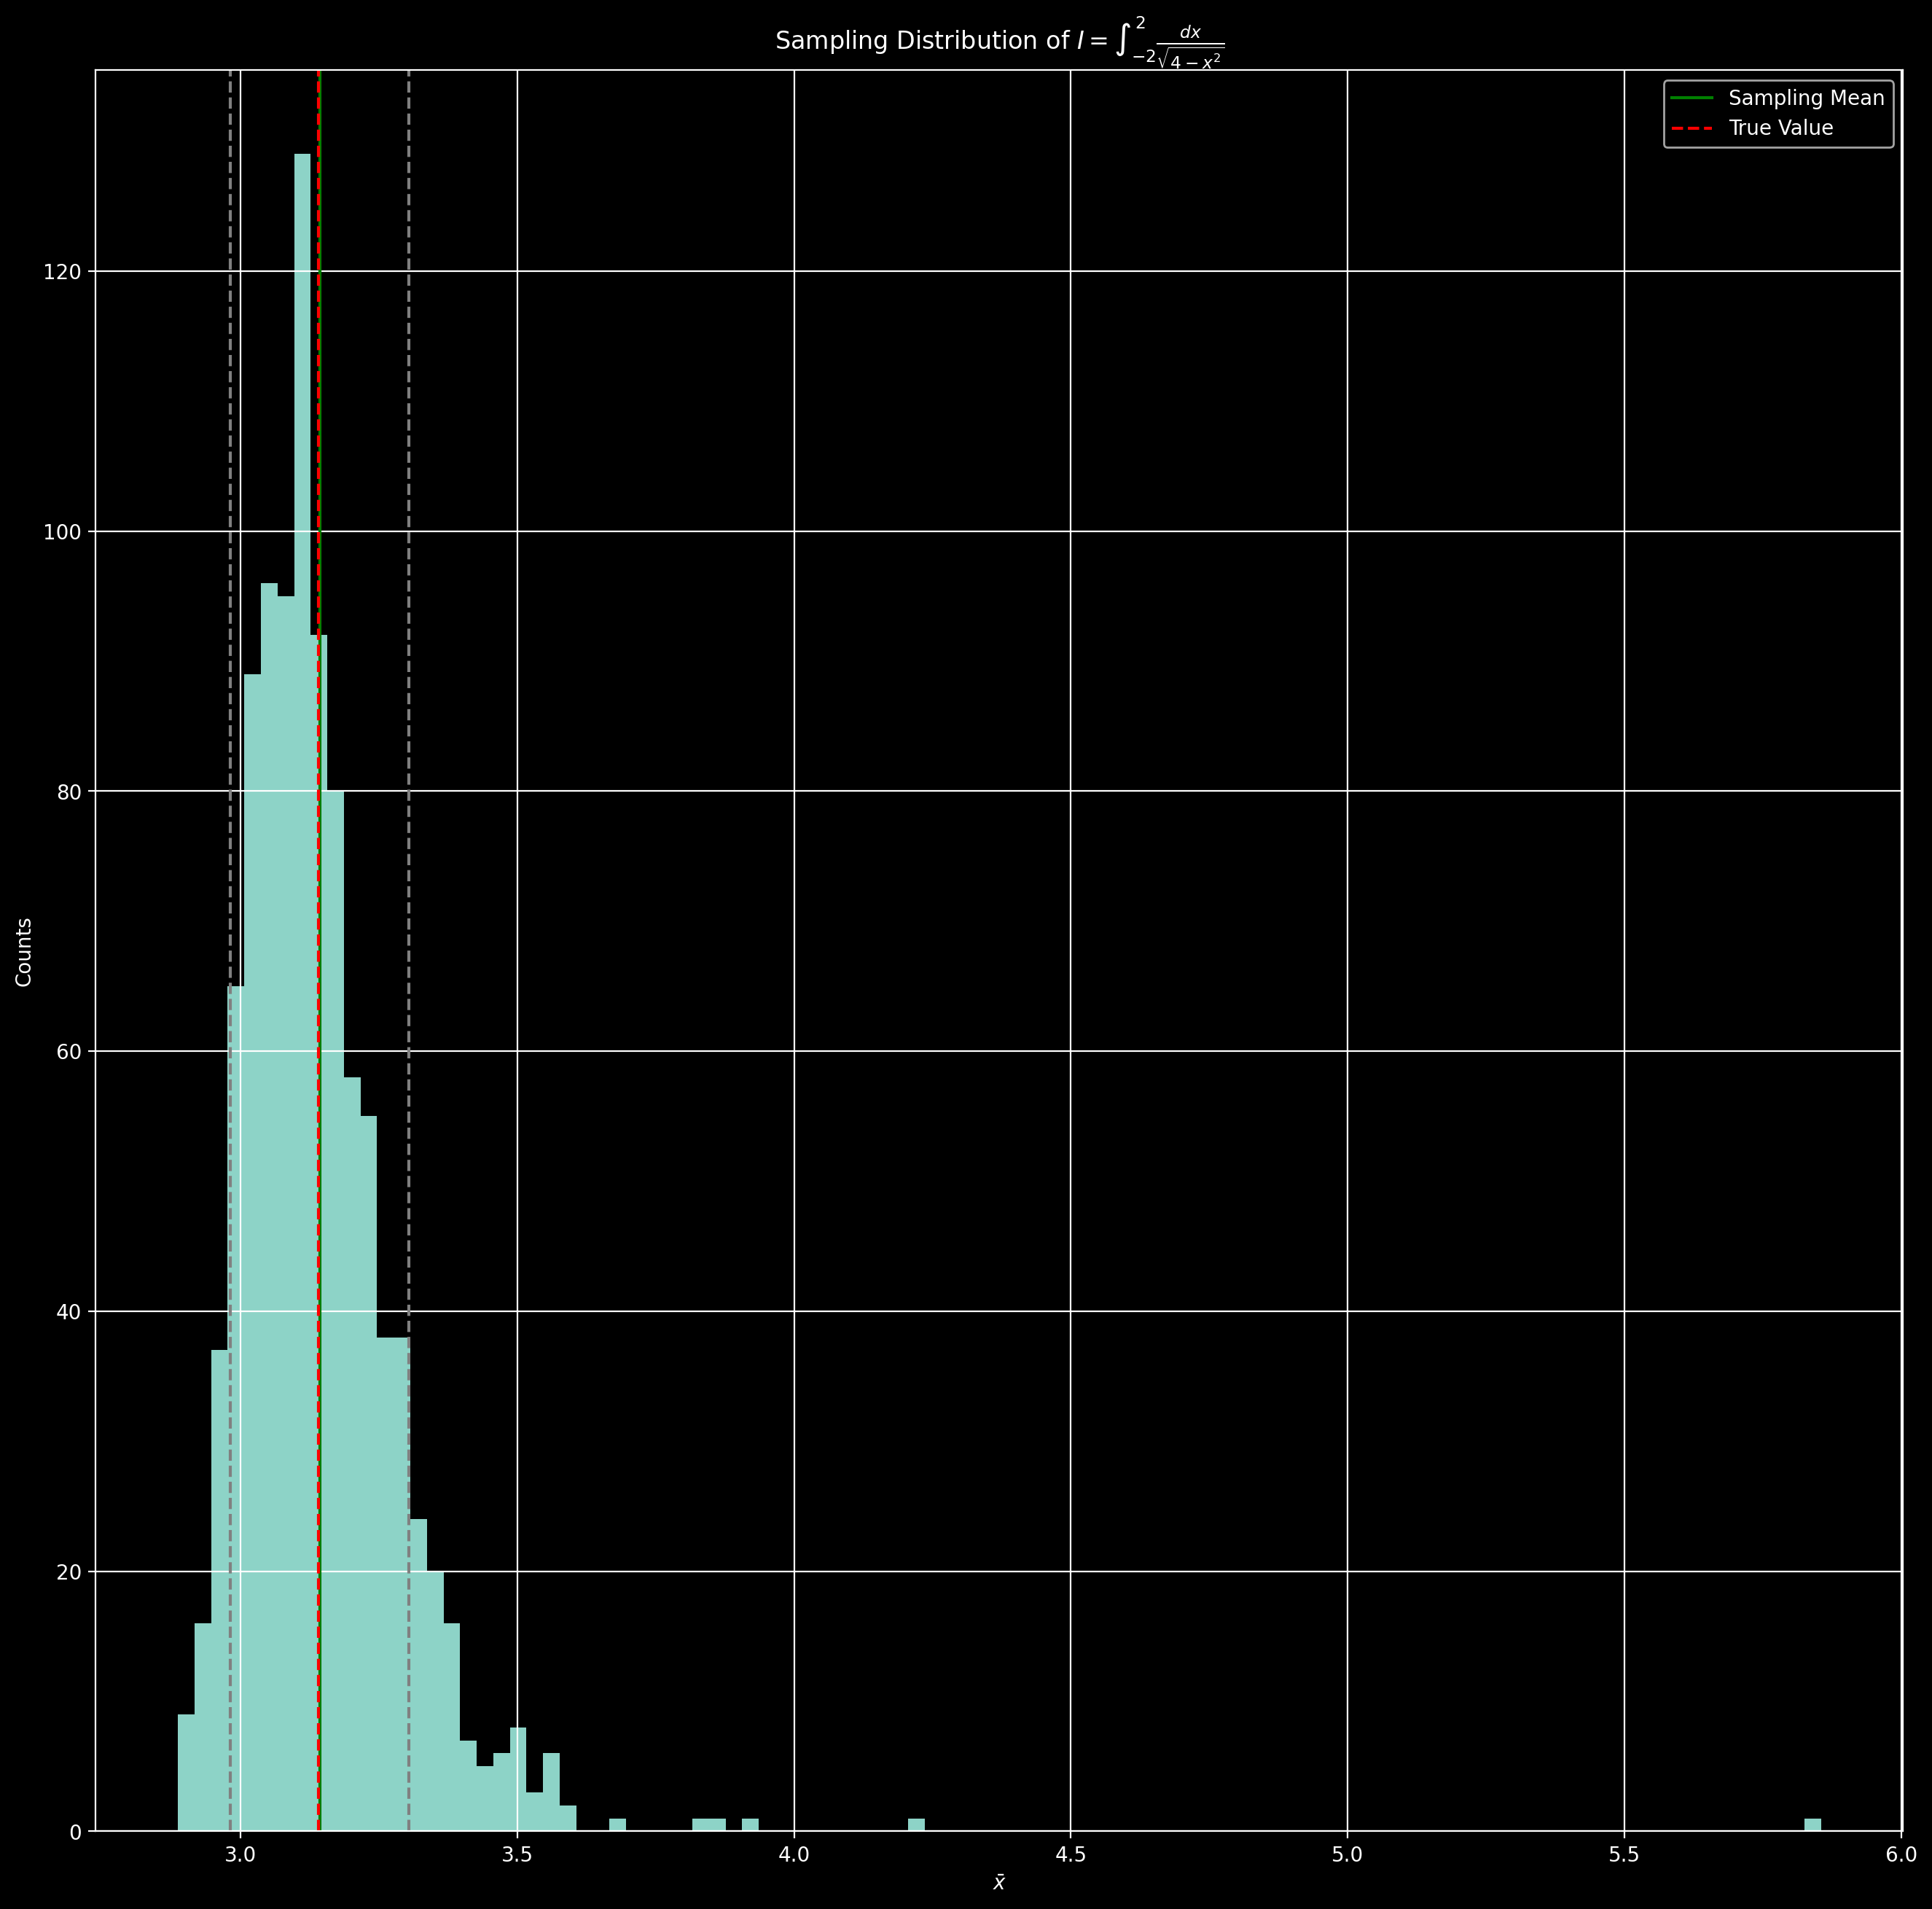

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)
ax.hist(I1, bins=bins1)
ax.axvline(mean, color='g', label='Sampling Mean')
ax.axvline(mean-std, c='gray', ls='--')
ax.axvline(mean+std, c='gray', ls='--')
ax.axvline(ans, c='r', ls='--', label='True Value')
ax.grid()
ax.legend()
ax.set_xlabel(r'$\bar{x}$')
ax.set_ylabel('Counts')
ax.set_title(r'Sampling Distribution of $I=\int_{-2}^2\frac{dx}{\sqrt{4-x^2}}$')
plt.savefig('plots/P1a_plot.png')

### Part B

In [10]:
x_i, x_f = 0, 10
x = np.linspace(x_i, x_f, _sample_size)
y = f2a(x)

<ipython-input-4-f54e83477492>:2: RuntimeWarning: divide by zero encountered in log
  f2a = np.vectorize(lambda x : np.exp(-x) * np.log(x))


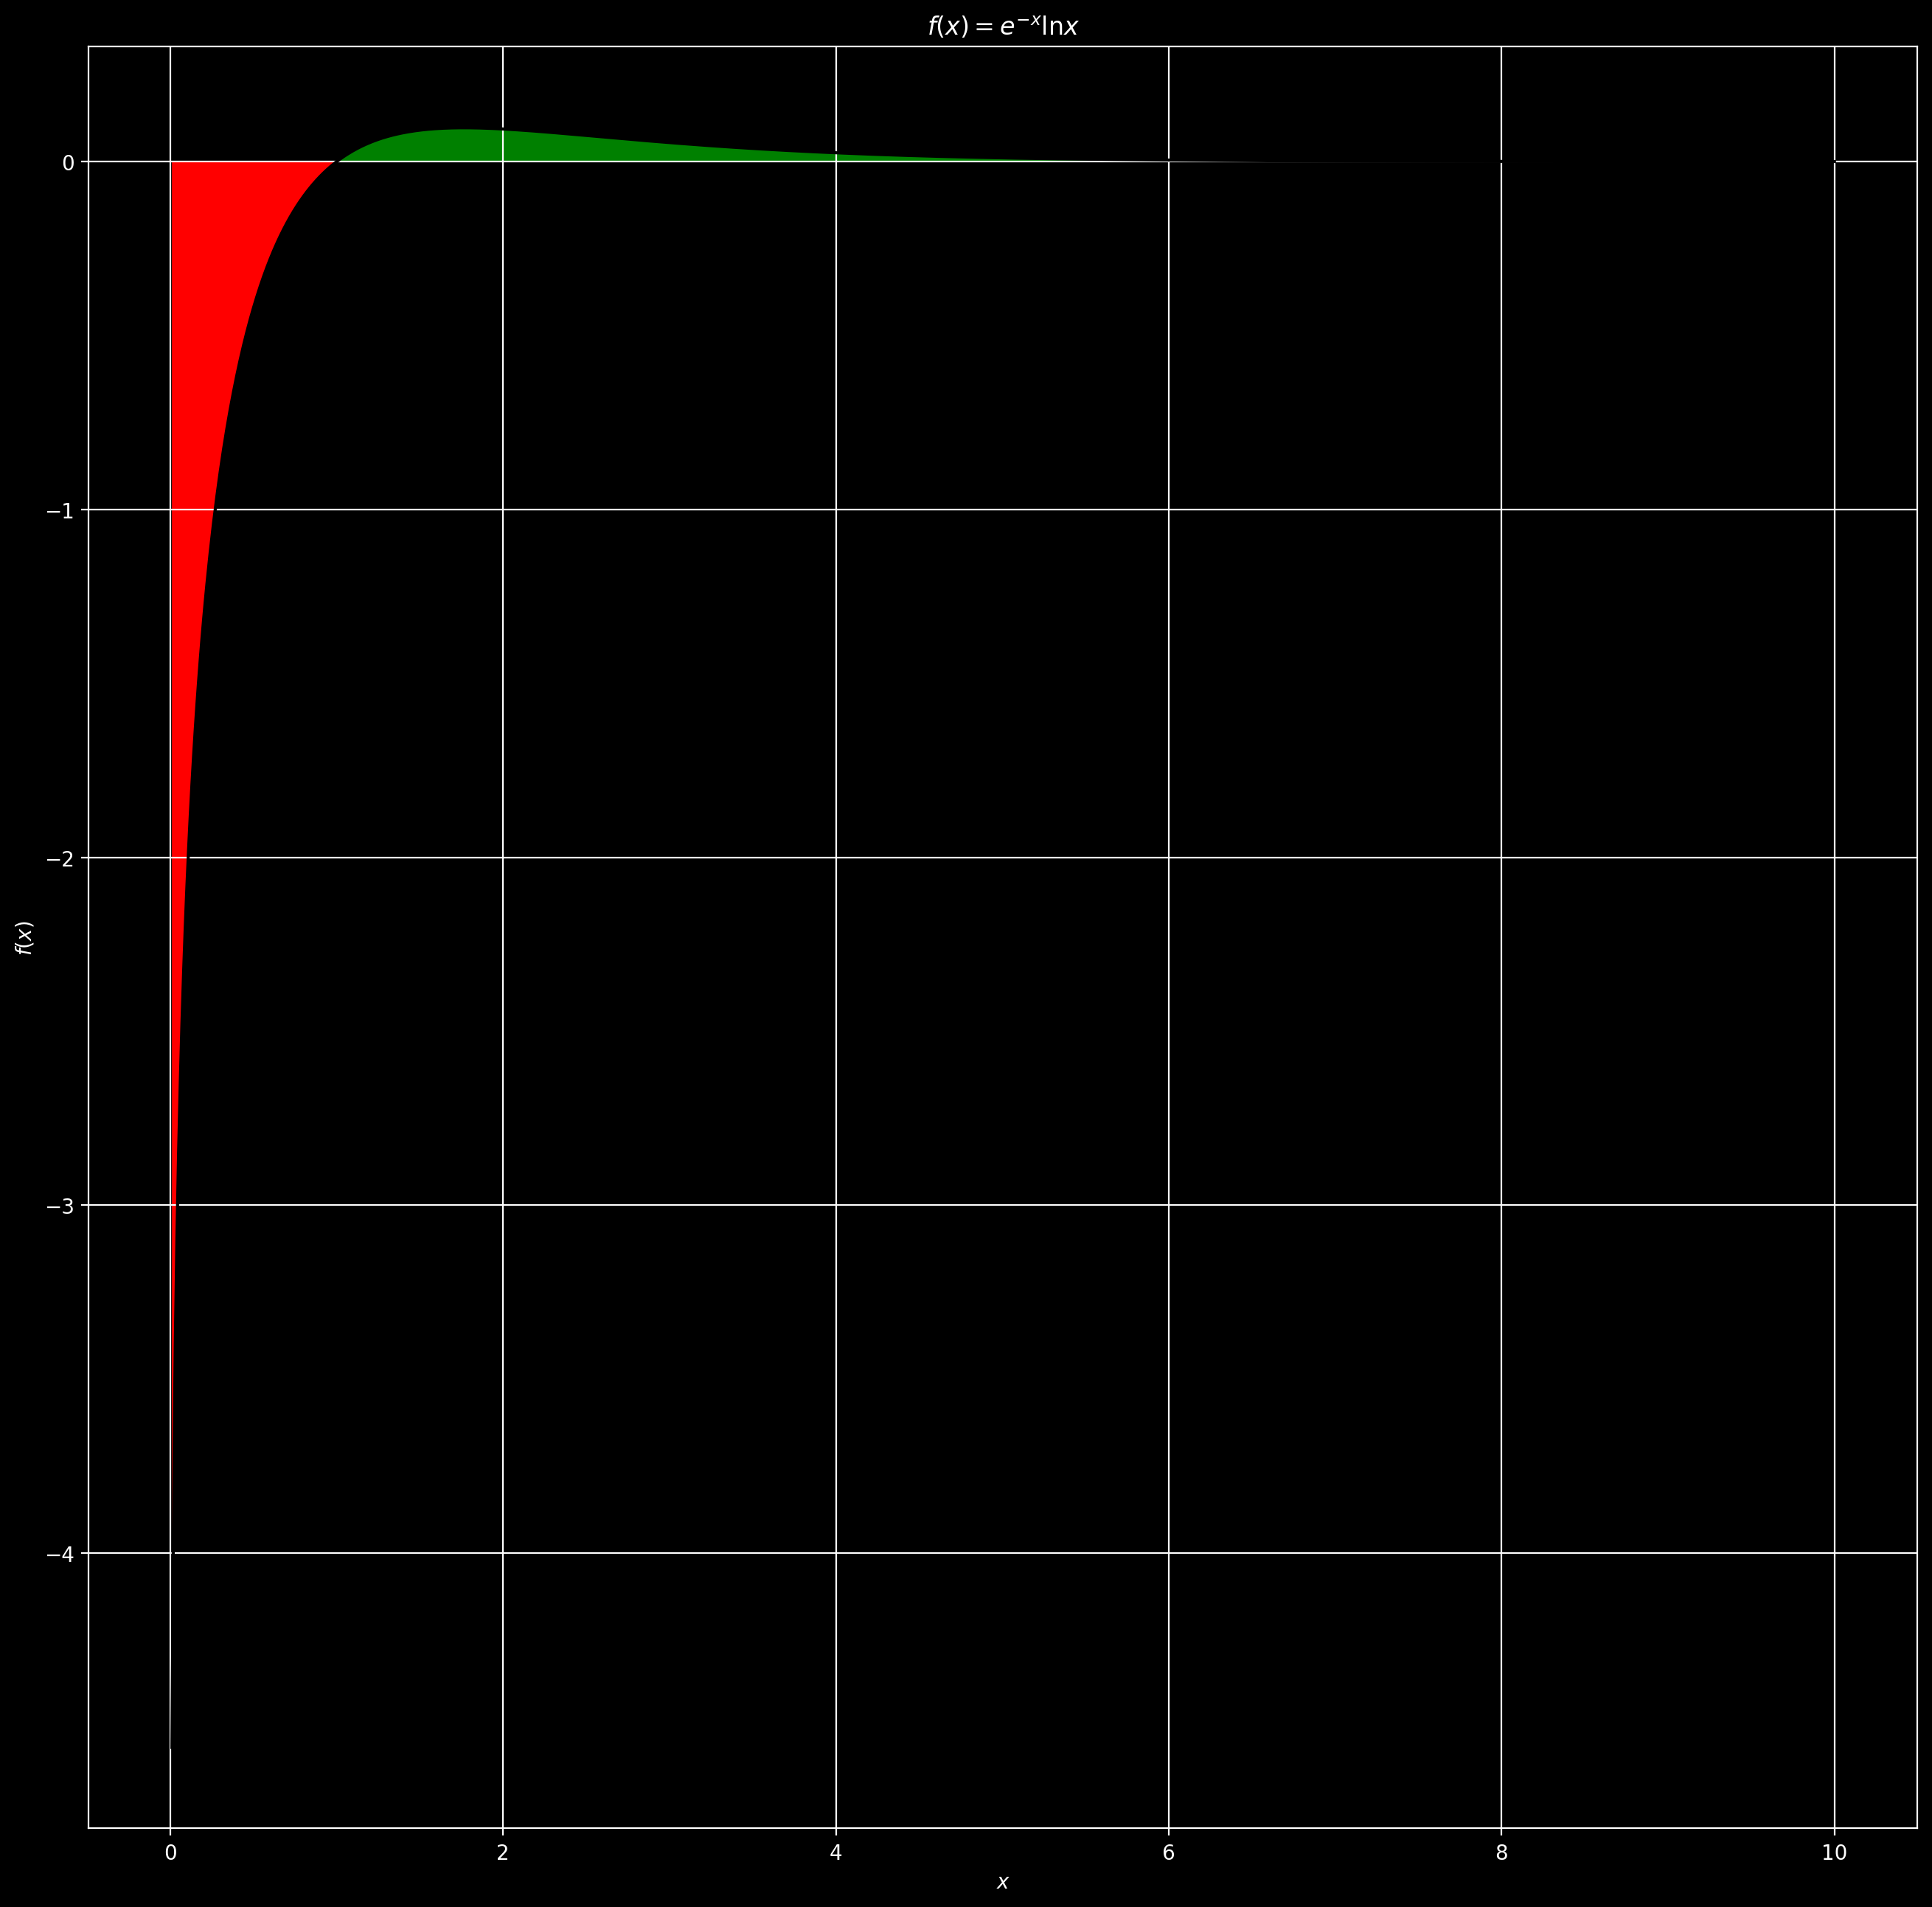

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)

ax.plot(x, y, c='k')
ax.fill_between(x, y, where=y <= 0, facecolor='red', interpolate=True)
ax.fill_between(x, y, where=y >= 0, facecolor='green', interpolate=True)

ax.set_title(r'$f(x)=e^{-x}\ln{x}$')
ax.set_ylabel(r'$f(x)$')
ax.set_xlabel(r'$x$')
ax.grid()

plt.savefig('plots/P1b_function_plot.png')

In [12]:
x_i, x_f = 0, np.pi / 2
x = np.linspace(x_i, x_f, _sample_size)
y = f2b(x)

<ipython-input-4-f54e83477492>:3: RuntimeWarning: divide by zero encountered in log
  f2b = np.vectorize(lambda x : np.exp(-np.tan(x))*np.log(np.tan(x))*np.power(np.cos(x), -2))


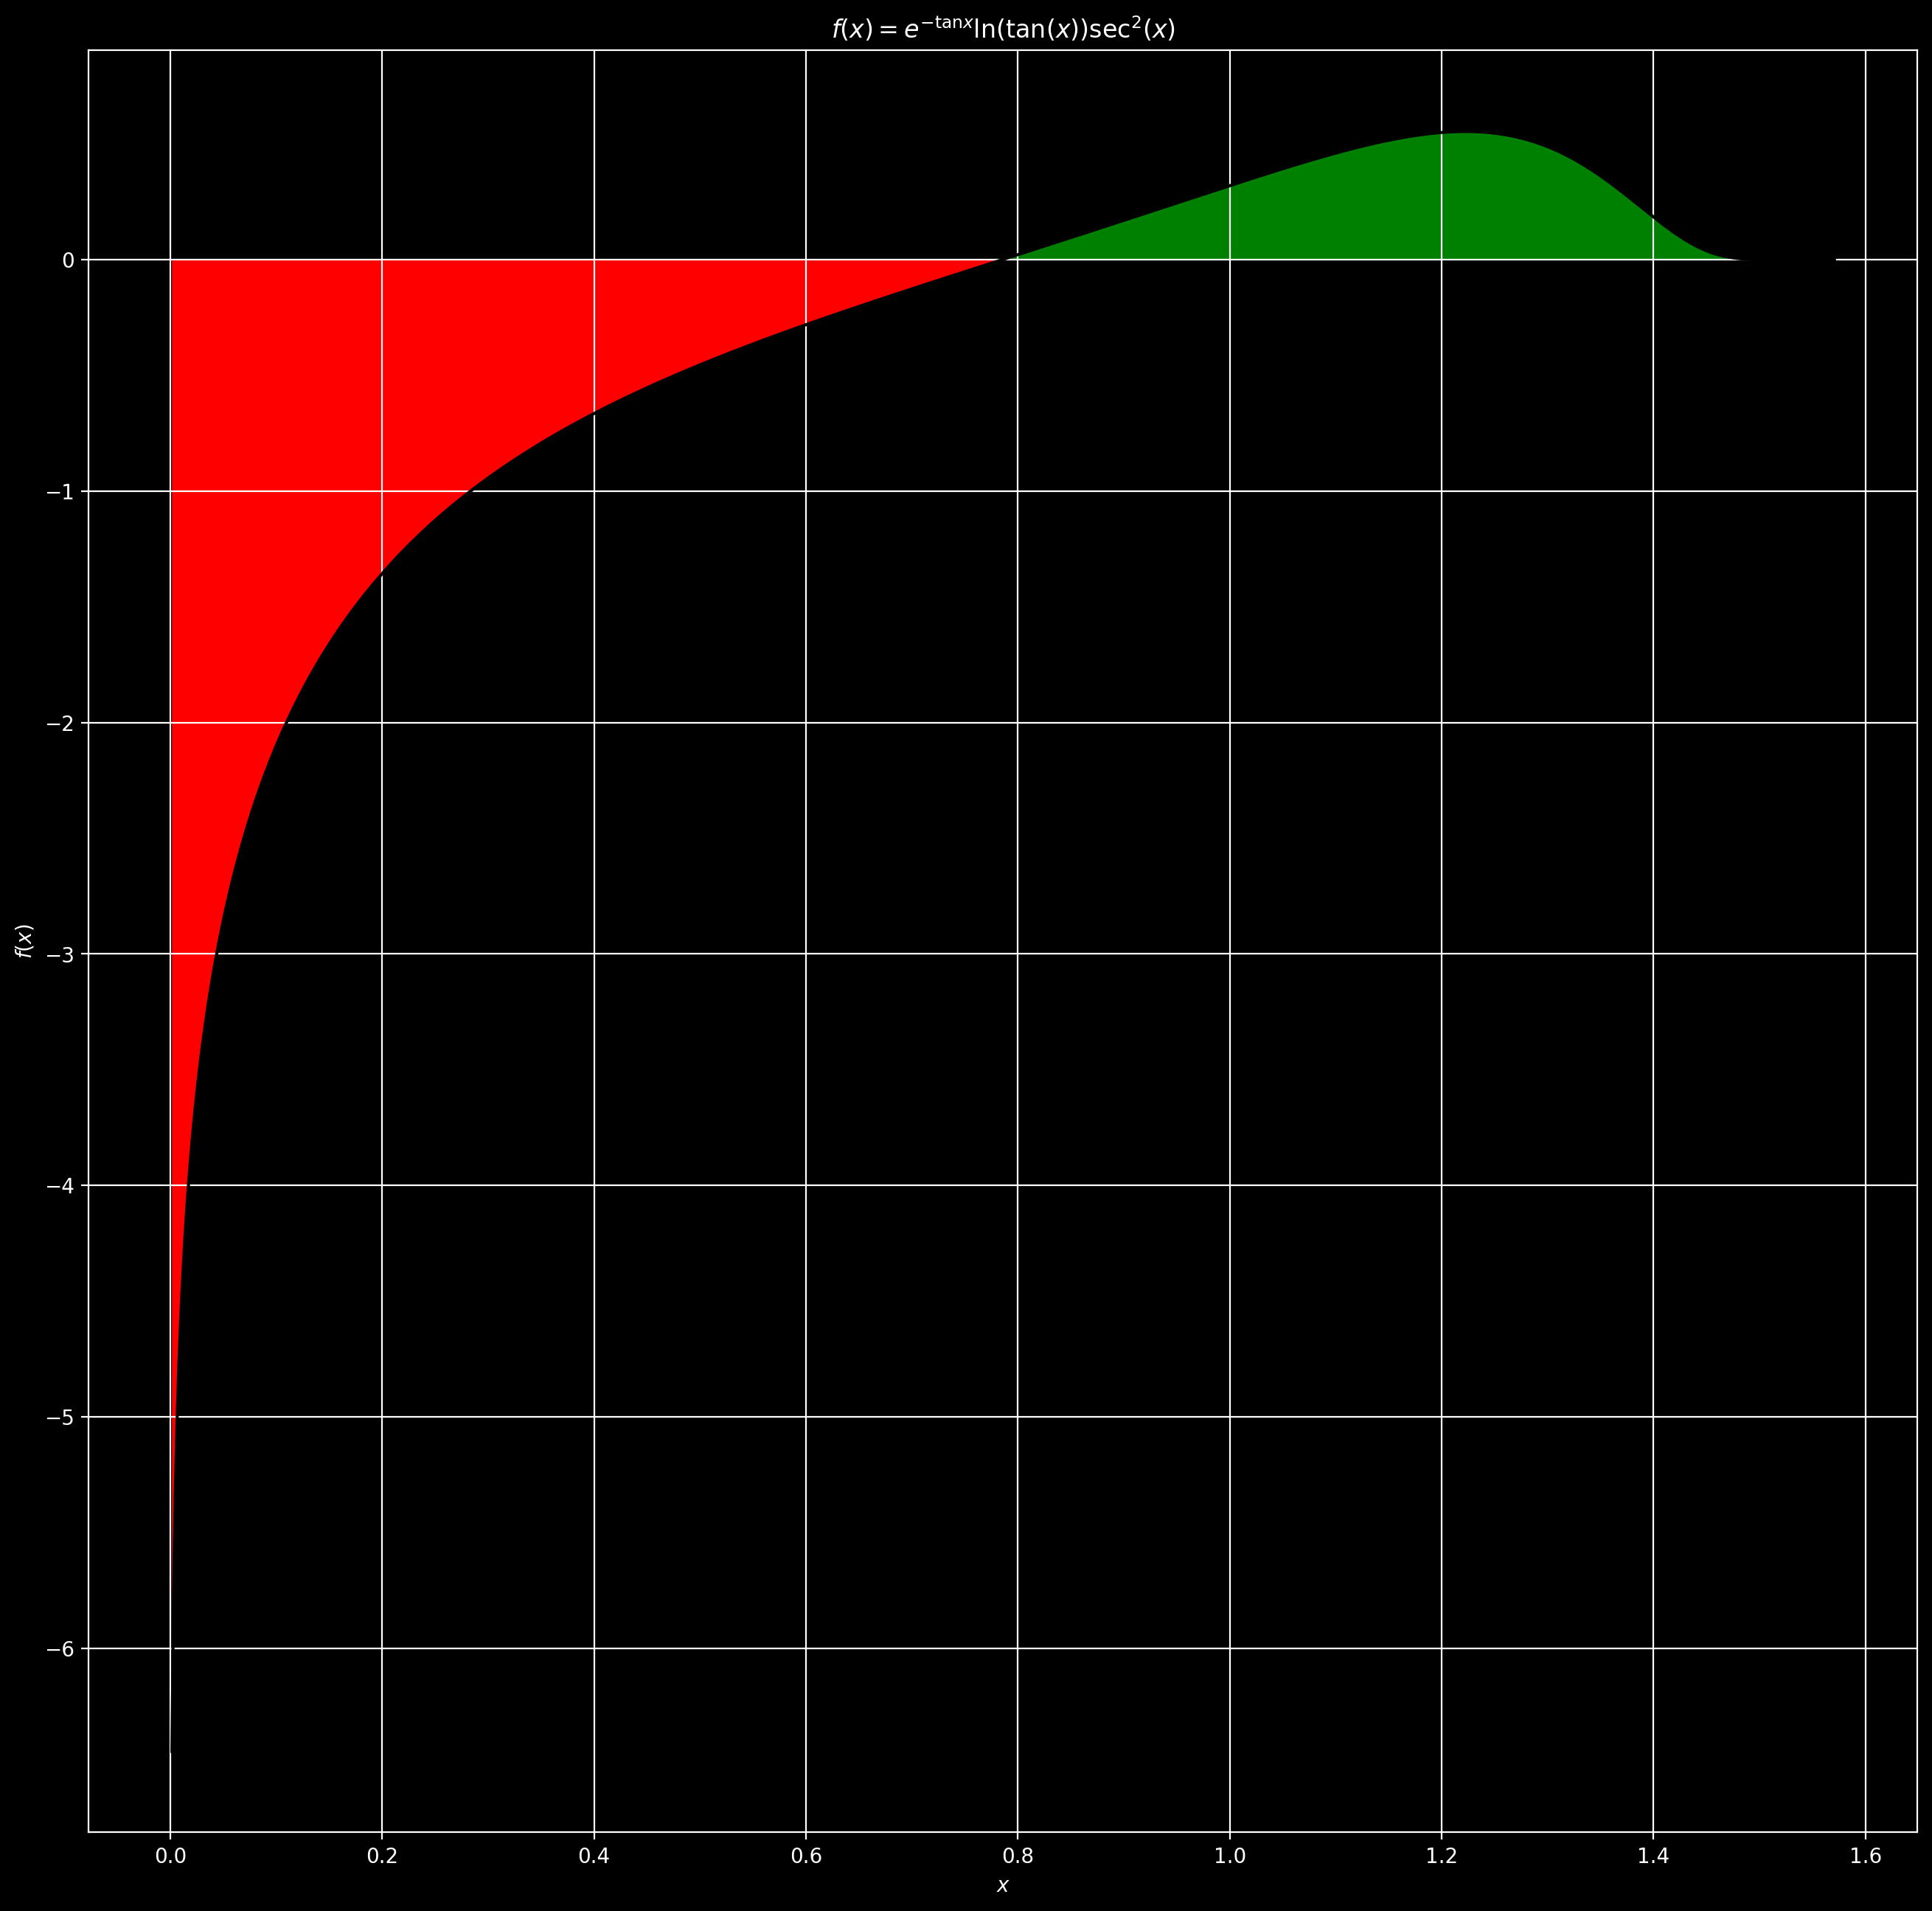

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)

ax.plot(x, y, c='k')
ax.fill_between(x, y, where=y <= 0, facecolor='red', interpolate=True)
ax.fill_between(x, y, where=y >= 0, facecolor='green', interpolate=True)

ax.set_title(r'$f(x)=e^{-\tan{x}}\ln{(\tan(x))}\sec^2(x)$')
ax.set_ylabel(r'$f(x)$')
ax.set_xlabel(r'$x$')
ax.grid()

plt.savefig('plots/P1b_function_transformed_plot.png')

In [14]:
I2, bins2 = MCInt_binned(f2b, 0, np.pi/2, _sample_size, _sampling_size, _nbins)
ans = -np.euler_gamma
mean = np.mean(I2)
std = np.std(I2)
display(Math(fr'\mu\approx\bar{{x}}={mean:0.6f}\\s={std:0.6f}\\\sigma={std/np.sqrt(_sampling_size):0.4f}\\\text{{Error}}={100*(mean-ans)/ans:0.6f}\,\%')) 

100%|██████████| 1000/1000 [00:29<00:00, 34.39it/s]


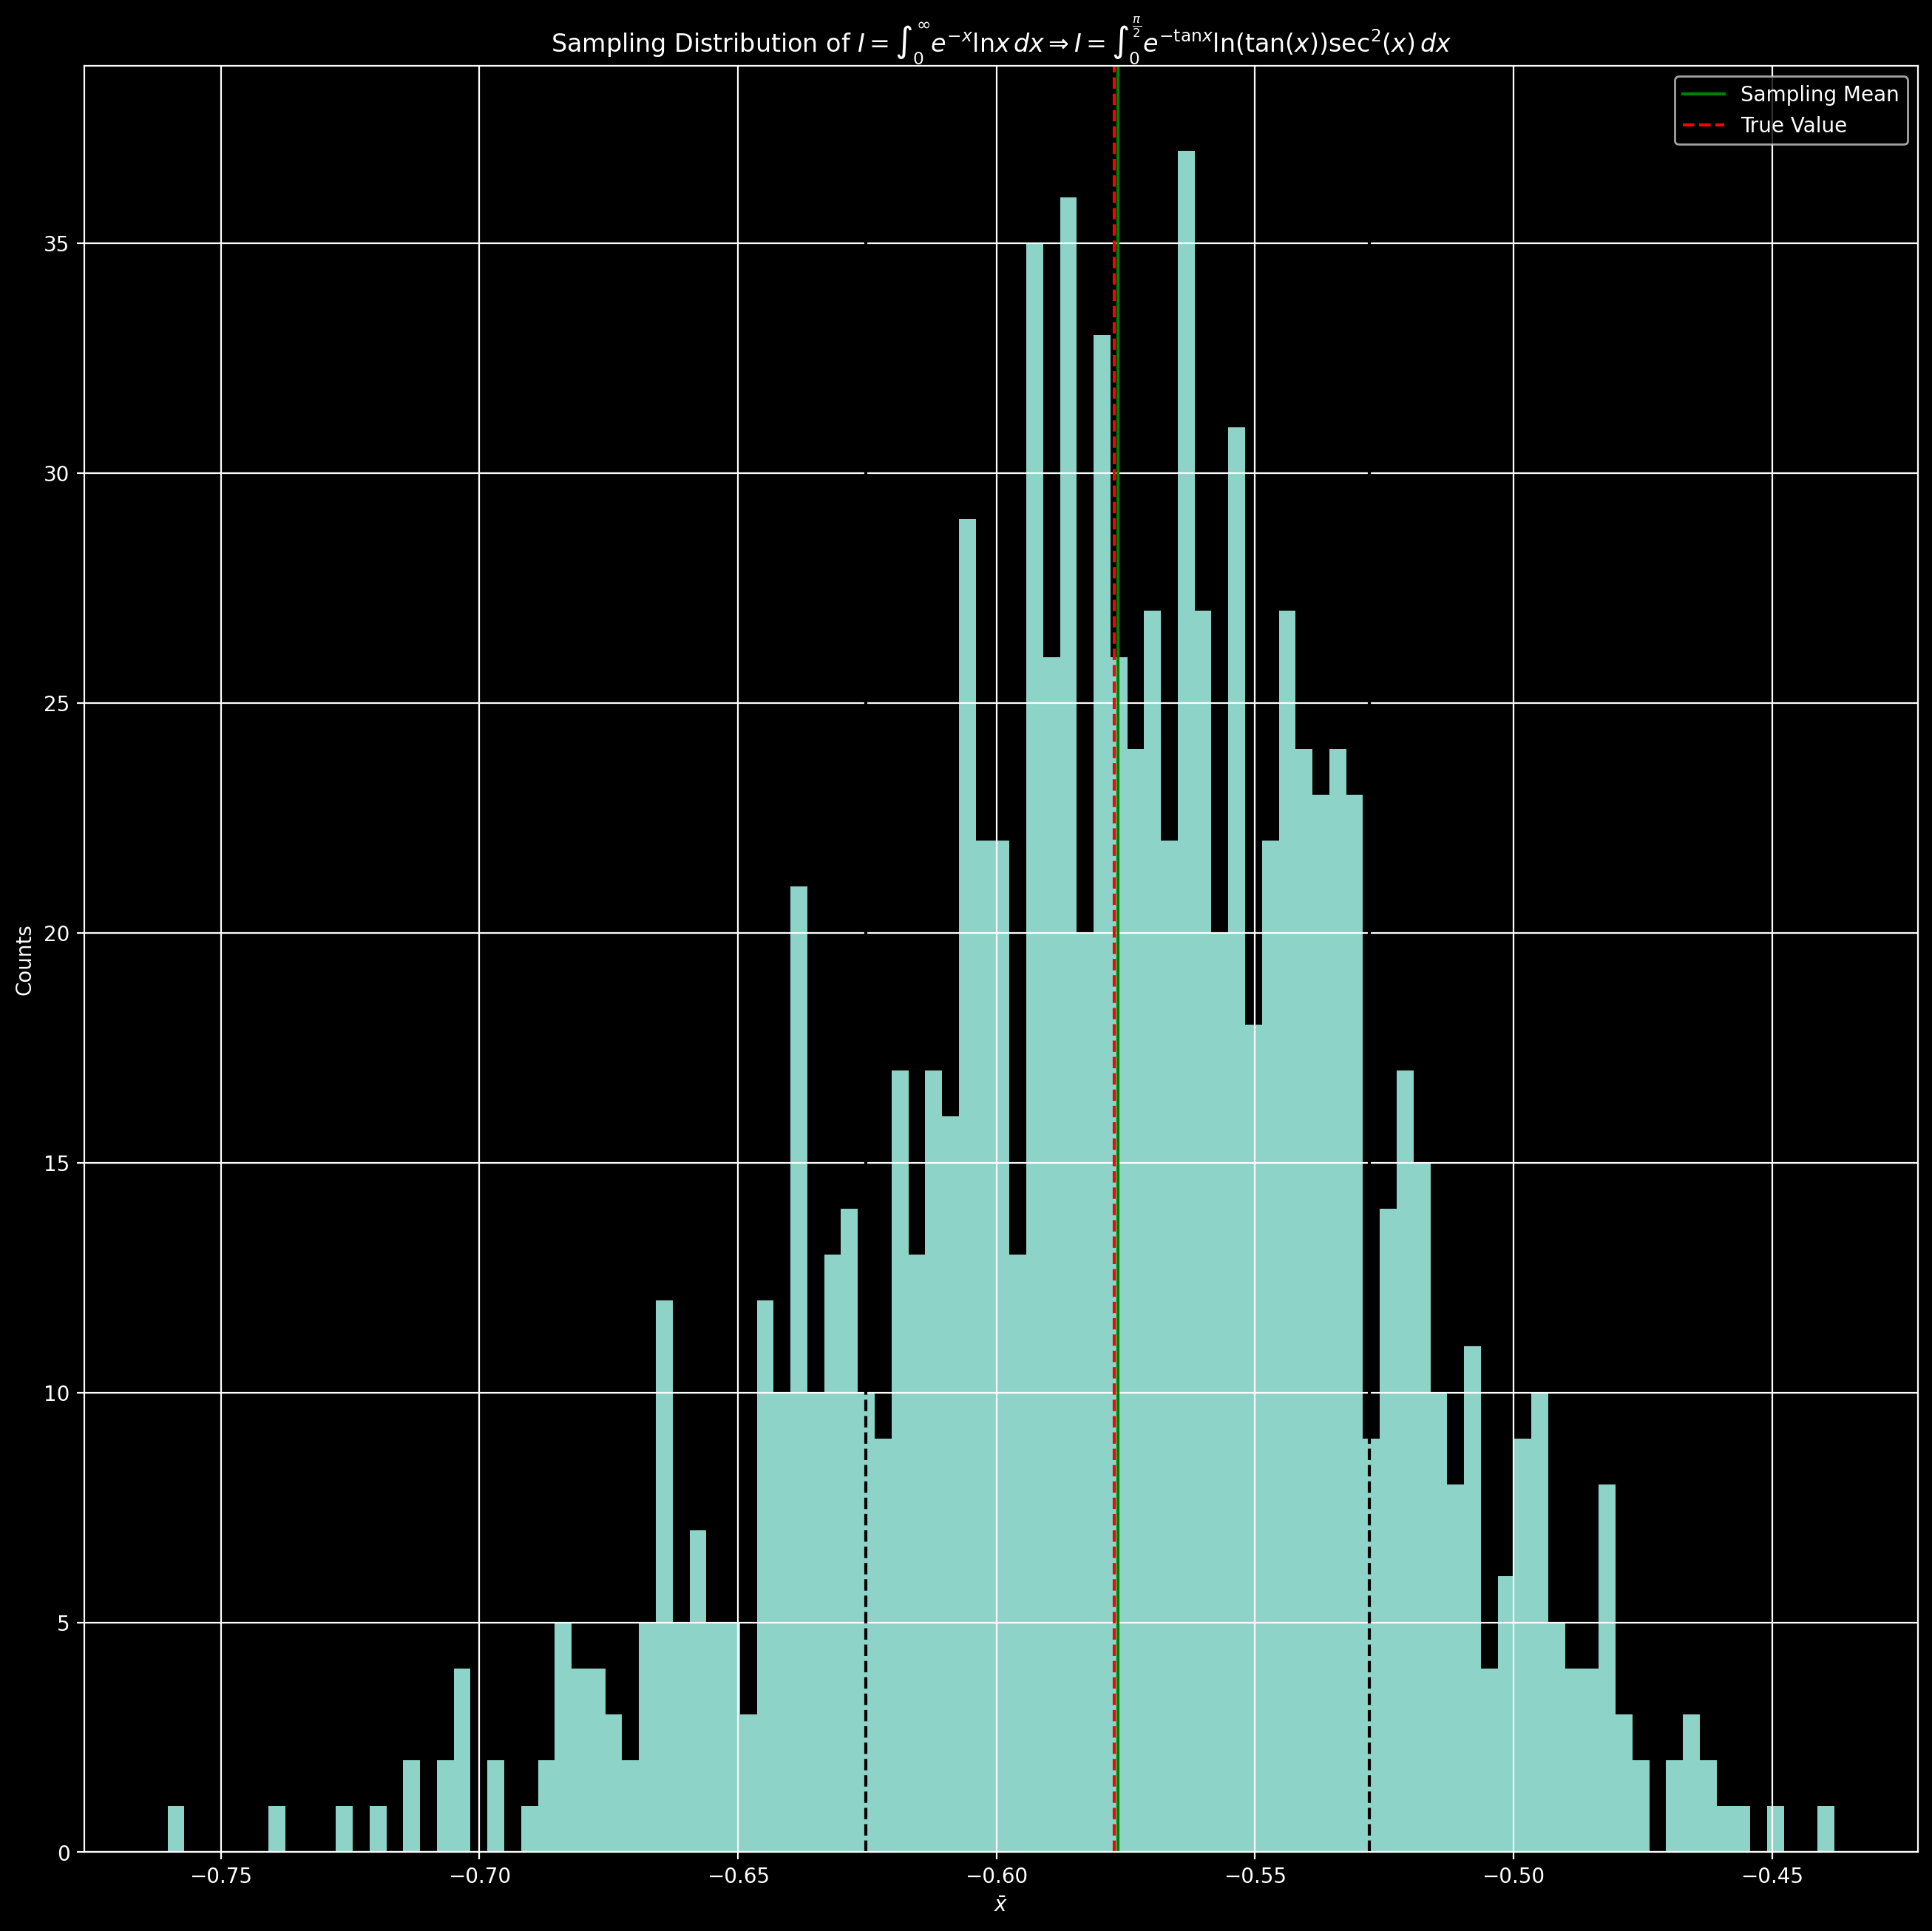

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)
ax.hist(I2, bins=bins2)
ax.axvline(mean, color='g', label='Sampling Mean')
ax.axvline(mean-std, c='k', ls='--')
ax.axvline(mean+std, c='k', ls='--')
ax.axvline(ans, c='r', ls='--', label='True Value')
ax.grid()
ax.legend()
ax.set_xlabel(r'$\bar{x}$')
ax.set_ylabel('Counts')
ax.set_title(r'Sampling Distribution of $I=\int_0^{\infty}e^{-x}\ln{x}\,dx\Rightarrow I=\int_0^{\frac{\pi}{2}}e^{-\tan{x}}\ln{(\tan(x))}\sec^2(x)\,dx$')
plt.savefig('plots/P1b_plot.png')

# Problem 2
Second, use the starter program ```rw2.py``` (or its Matlab version ```rw2d.m```/```generate_rw.m```, or your own equivalent code) to generate random walks on the square lattice in two dimensions. Note, the same program and its output have been discussed in class already. For this lab, modify the program to calculate walks with random step length $0<d<1$ in continuously random directions - i.e., the walk is still in two dimensions, but no longer on a lattice. Analyze the mean square displacement $E\left(r_n^2\right)$ for $n$-step continuous random walks, and calculate the mean fluctuation (standard deviation) of $r_n^2$ (i.e., the square root of the variance of $r_n^2$ defined by $\sqrt{E\left(\left(r_n^2\right)^2\right)-\left(E\left(r_n^2\right)\right)^2}$. Is the latter of the same order as $E\left(r_n^2\right)$ itself?  If that is true, then the fluctuation is just as large as the mean, and thus you cannot tell statistical properties by generating just a few random walks, however long the walks maybe.

In [14]:
def RW(num_steps=100000):
    rng = np.random.default_rng()
    theta = 2 * np.pi * rng.random(num_steps)
    r = rng.random(num_steps)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    steps = np.vstack((x, y))
    positions = np.cumsum(steps, 1)
    return positions

def RW_diffusion(num_steps=1000, num_walkers=10000, func=lambda _ : _):
    rng = np.random.default_rng()
    ensemble = np.zeros((num_walkers, num_steps))
    for i in trange(num_walkers):
        theta = 2 * np.pi * rng.random(num_steps)
        r = rng.random(num_steps)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        steps = np.vstack((x, y))
        positions = np.cumsum(steps, 1)
        ensemble[i,:] = func(np.power(np.apply_along_axis(np.linalg.norm, 0, positions), 2))
    return ensemble

<!-- ### 2D Random Walk | Path | $\left(x_n,y_n\right)$ -->
## 2D Random Walk
### Path | $\left(x_n,y_n\right)$

In [3]:
rw = RW()

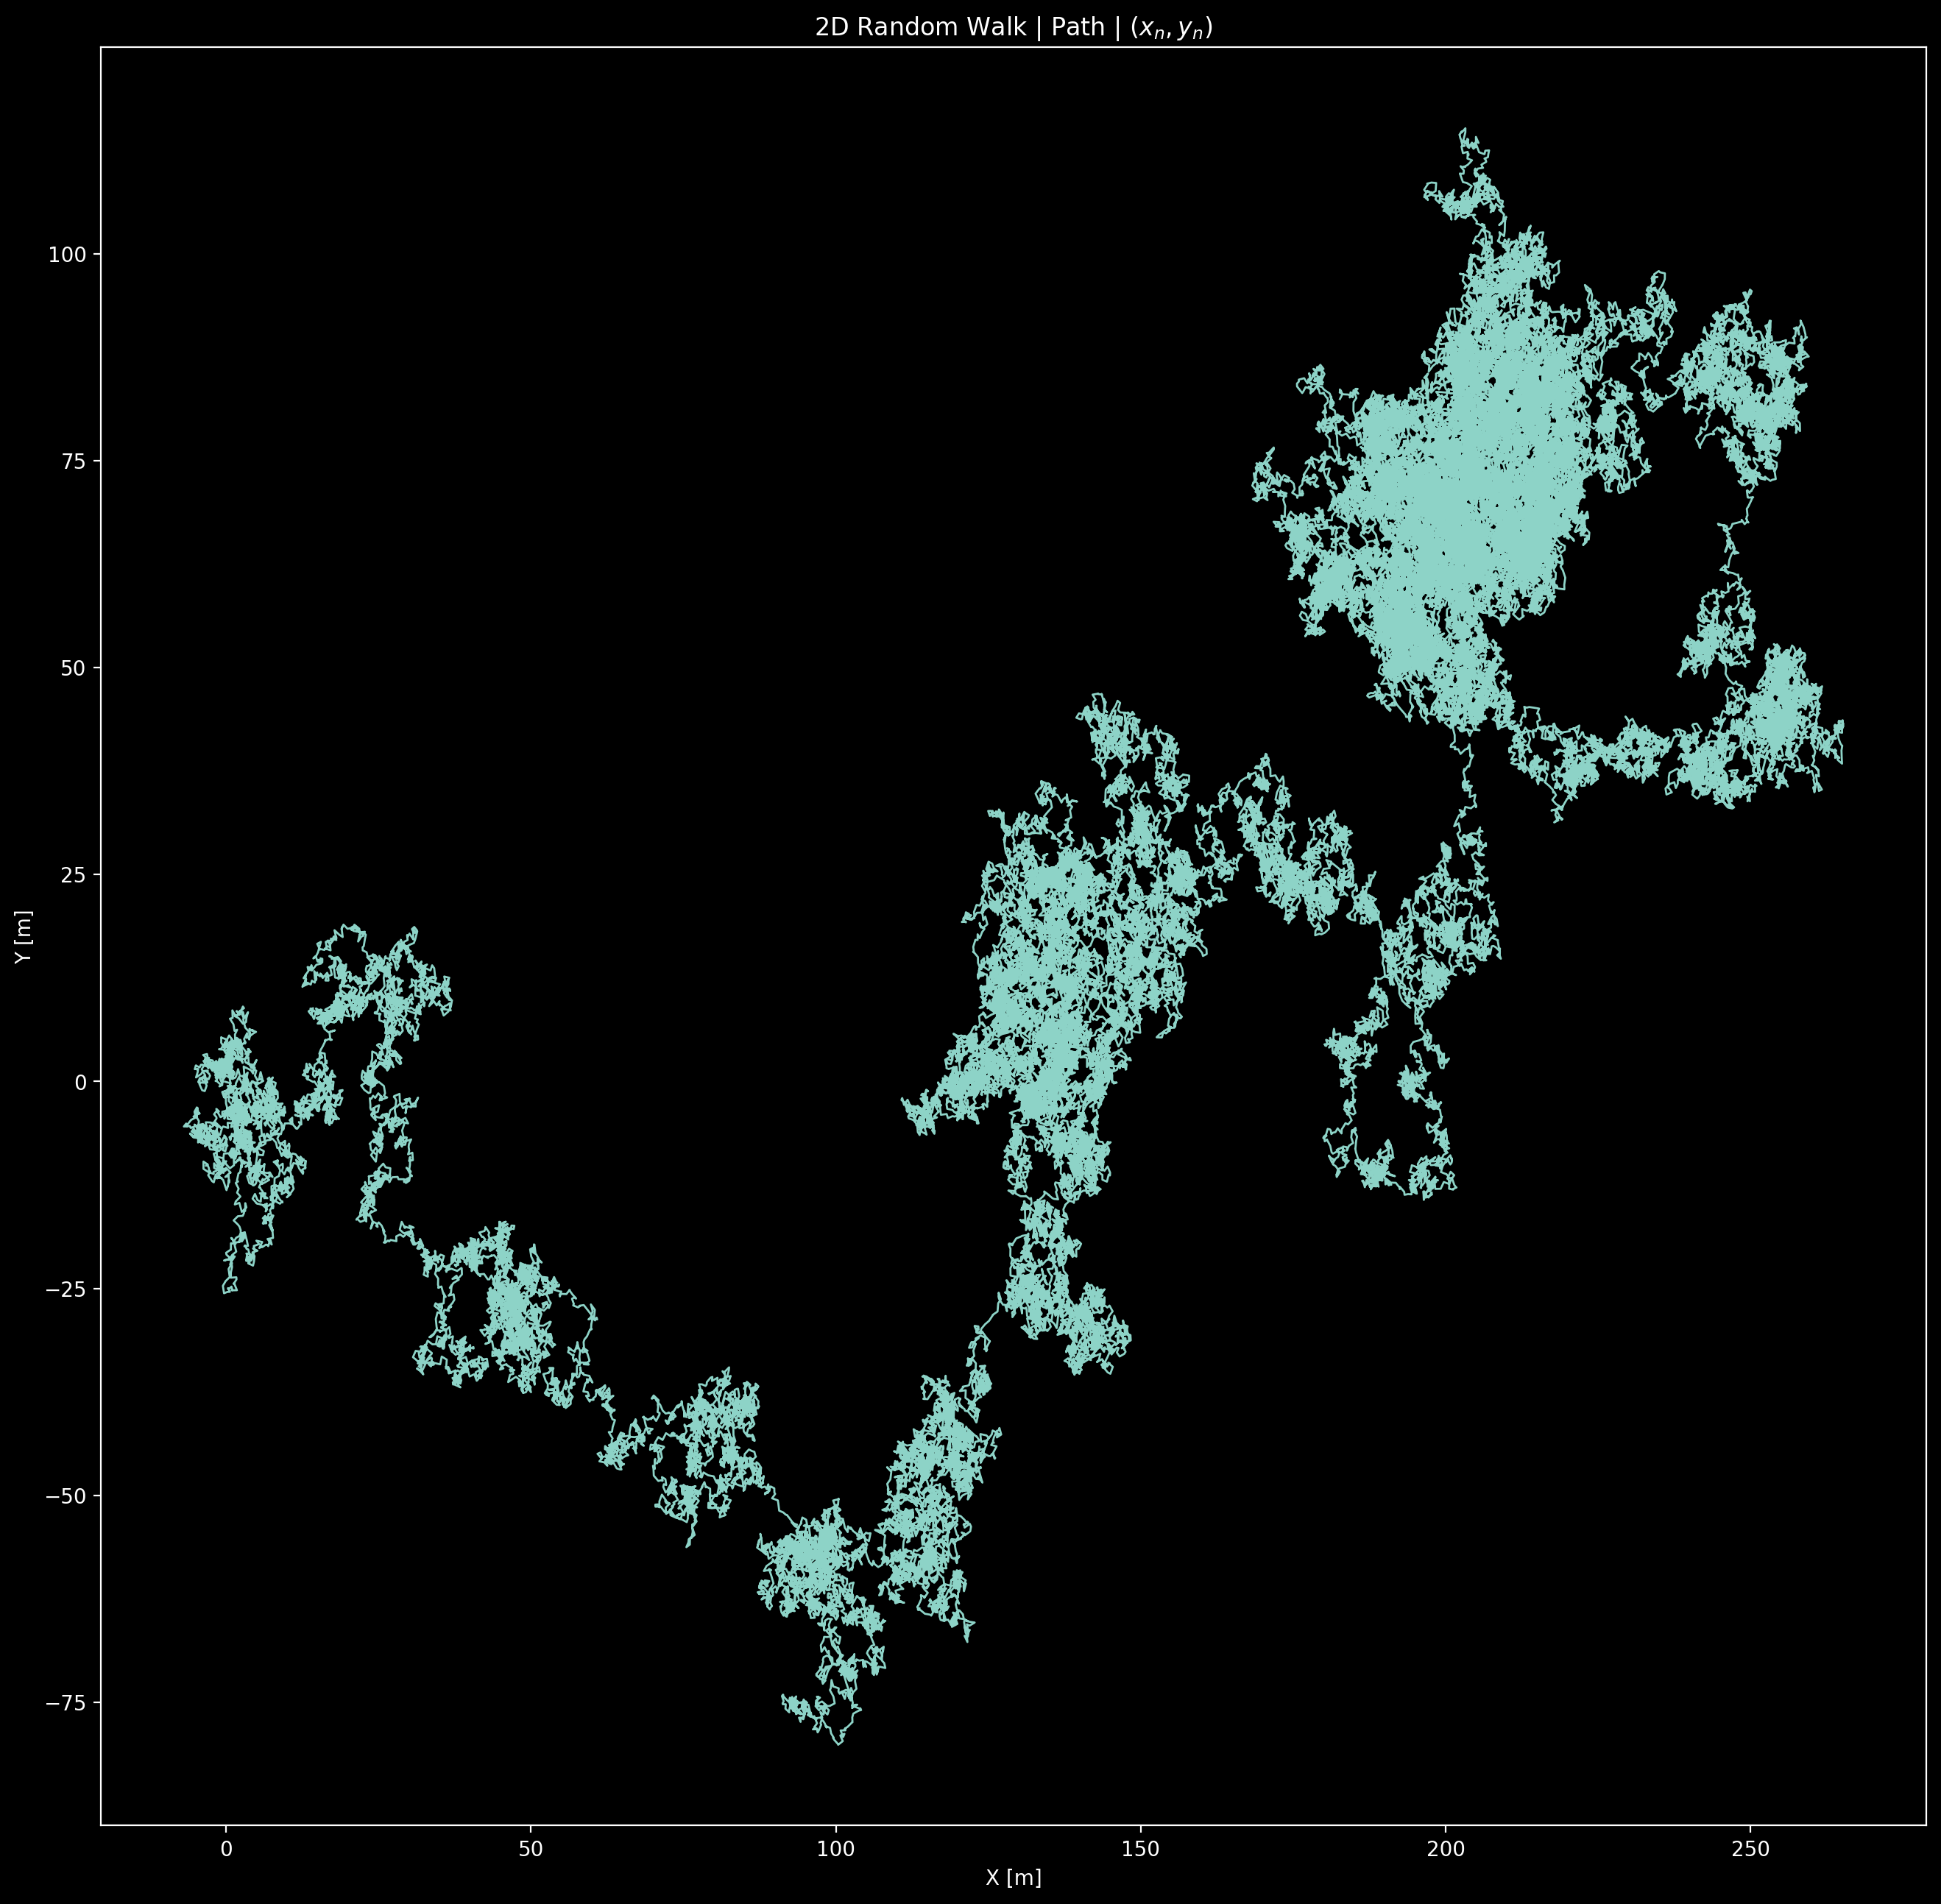

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=200)
ax.set_title(r"2D Random Walk | Path | $\left(x_n,y_n\right)$")
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.plot(rw[0], rw[1], lw=1)
plt.savefig('plots/Problem_2a.png')

<!-- ### 2D Random Walk | Mean Radial Distance (Squared) | $\left<r^2_n\right>$ -->
### Mean Radial Distance (Squared) | $\left<r^2_n\right>$

In [15]:
ensemble_2 = RW_diffusion()
mean_distances_2 = np.apply_along_axis(np.mean, 0, ensemble_2)

100%|██████████| 10000/10000 [02:14<00:00, 74.09it/s]


In [16]:
fit_func = lambda x, a, b : a + b * x
fit_x = range(mean_distances_2.size)
(a, b), _ = curve_fit(fit_func, fit_x, mean_distances_2)

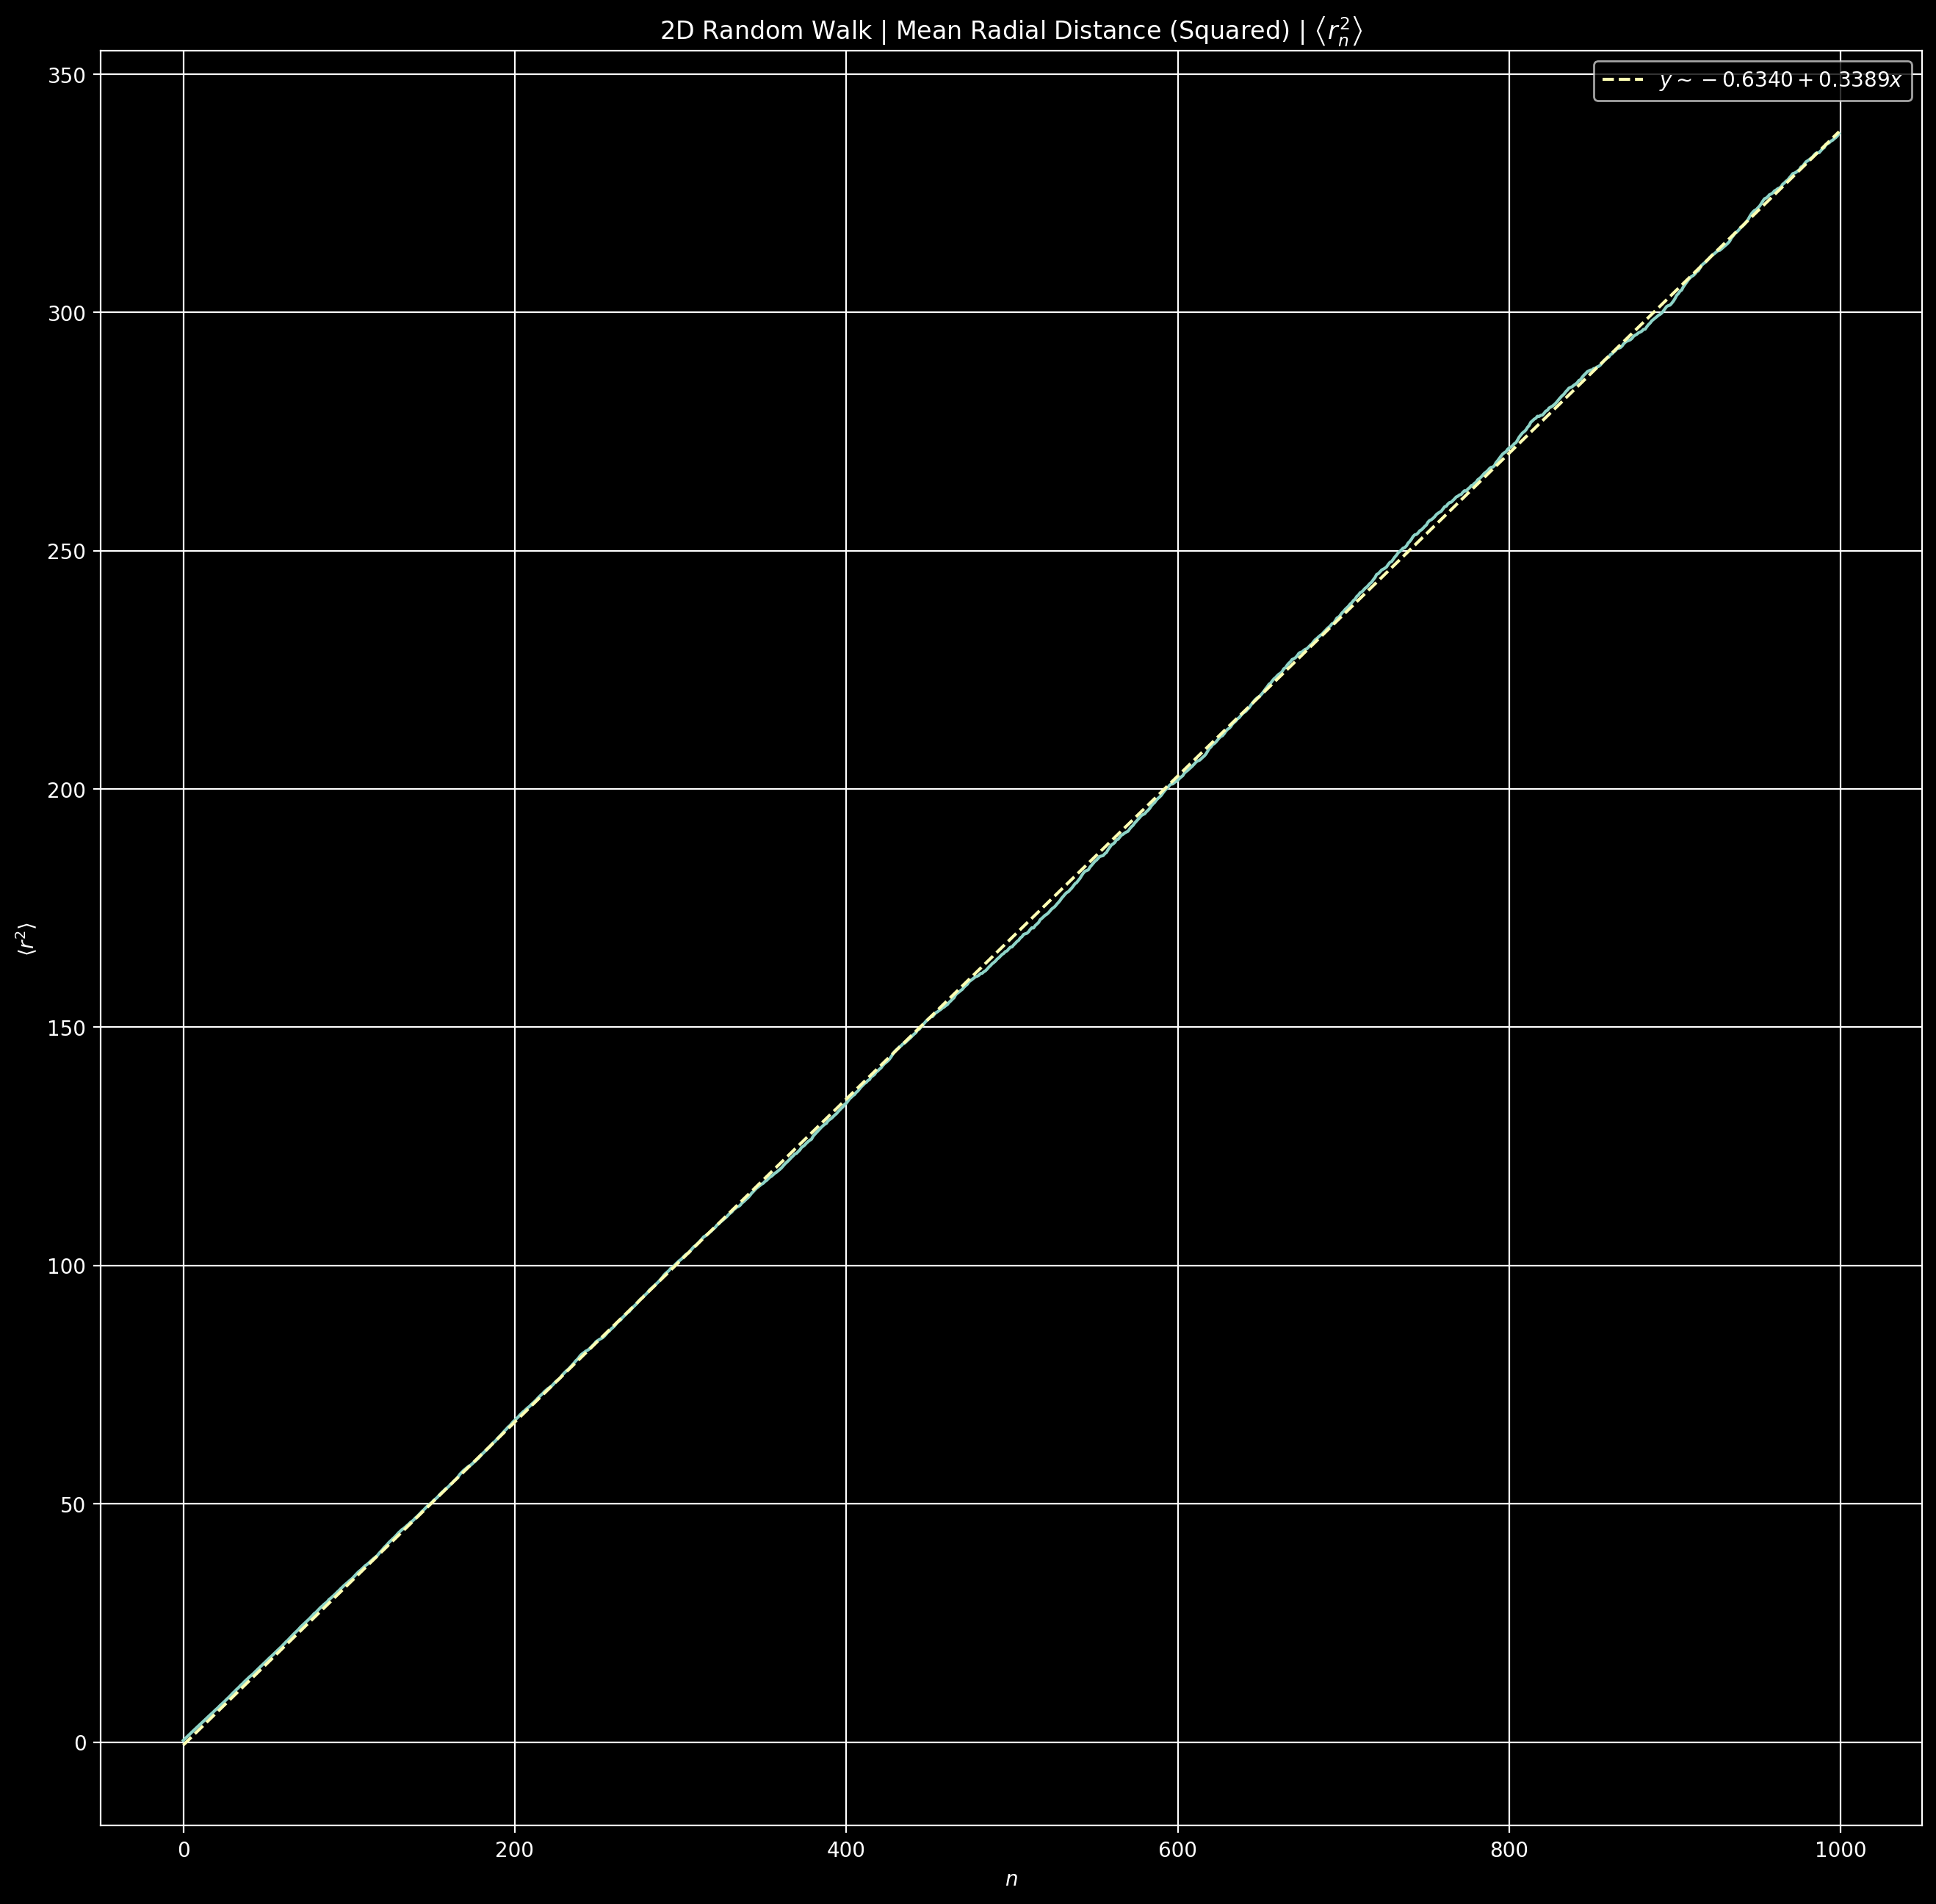

In [17]:
fig, ax = plt.subplots(1,1,figsize=(16,16), dpi=200)
ax.plot(mean_distances_2)
ax.plot(fit_x, fit_func(fit_x, a, b), ls='--', label=fr'$y\sim{a:0.4f}+{b:0.4f}x$')
ax.set_title(r'2D Random Walk | Mean Radial Distance (Squared) | $\left<r^2_n\right>$')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\left<r^2\right>$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem_2b.png')

<!-- ### 2D Random Walk | Mean Squared Radial Distance (Squared) | $\left<\left(r^2_n\right)^2\right>$ -->
### Mean Squared Radial Distance (Squared) | $\left<\left(r^2_n\right)^2\right>$

In [18]:
ensemble_4 = RW_diffusion(func=lambda _ : np.power(_, 2))
mean_distances_4 = np.apply_along_axis(np.mean, 0, ensemble_4)

100%|██████████| 10000/10000 [01:44<00:00, 95.27it/s] 


<!-- ### 2D Random Walk | Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$ -->
### Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$

In [19]:
sigma_distances_2 = np.sqrt(mean_distances_4 - np.power(mean_distances_2, 2))

In [20]:
fit_func = lambda x, c, v : c * np.power(x, 2 * v)
fit_x = range(sigma_distances_2.size)
(c, v), _ = curve_fit(fit_func, fit_x, sigma_distances_2)

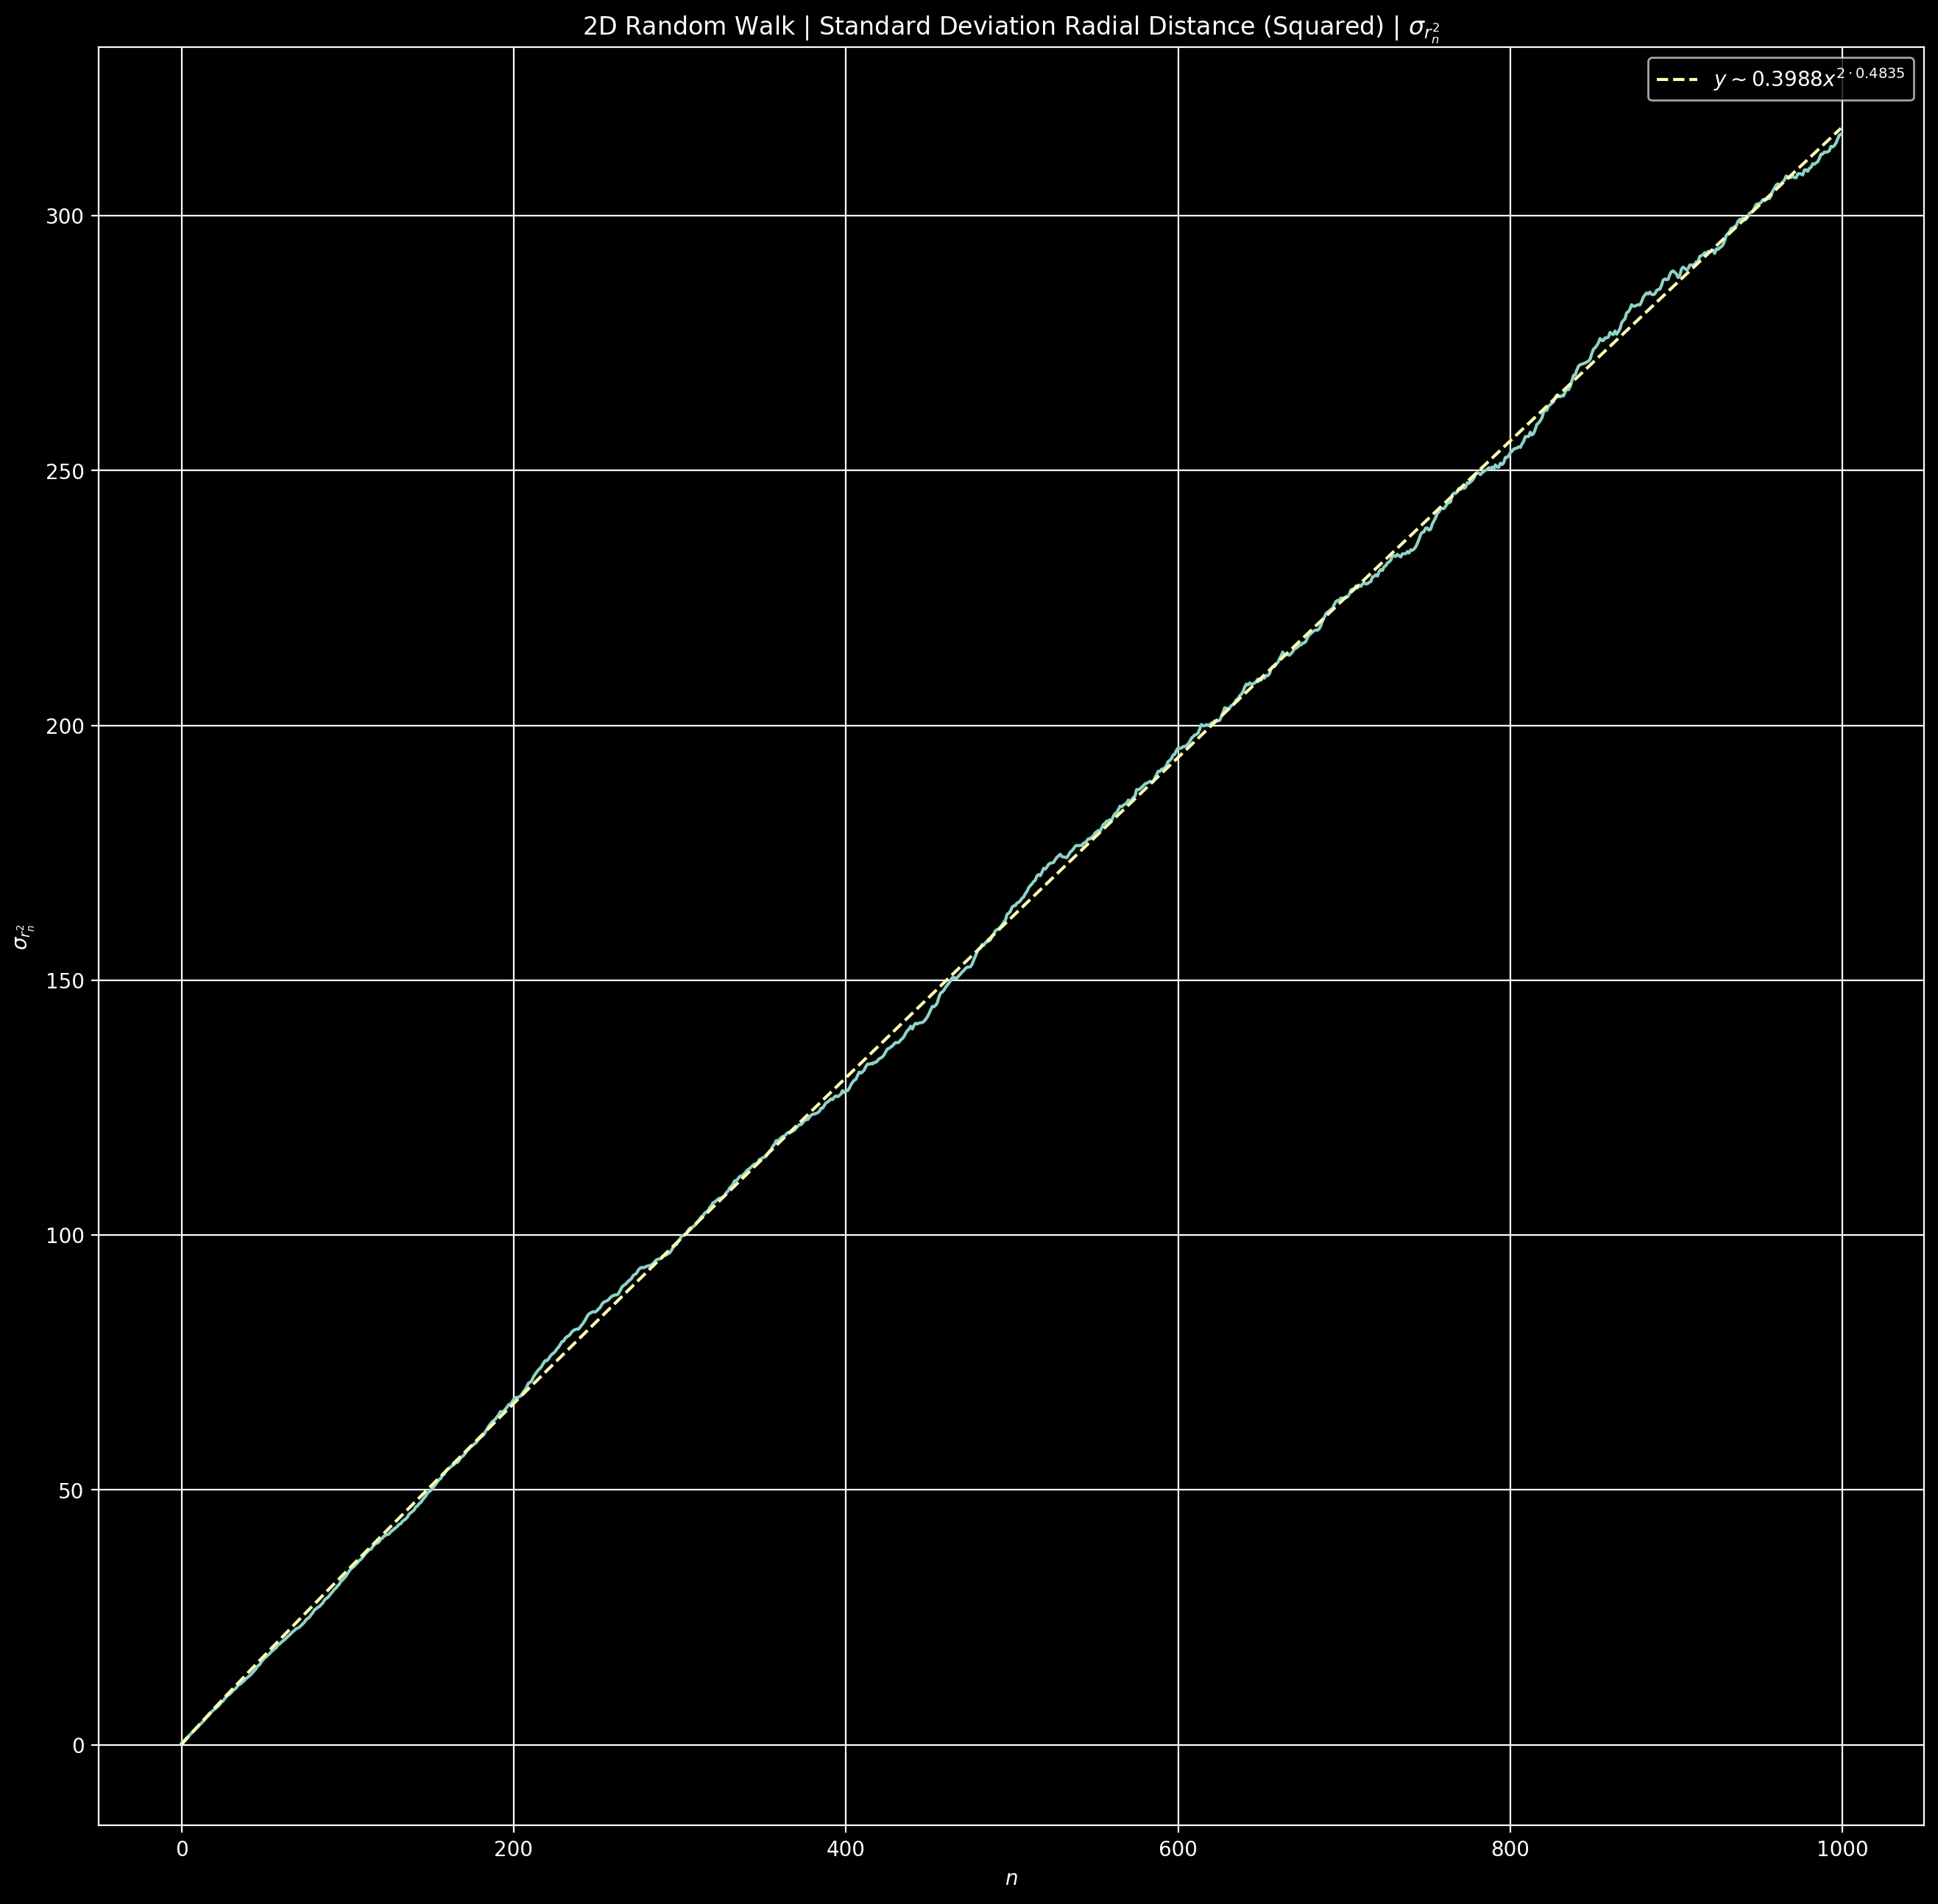

In [21]:
fig, ax = plt.subplots(1,1,figsize=(16,16), dpi=200)
ax.plot(sigma_distances_2)
ax.plot(fit_x, fit_func(fit_x, c, v), ls='--', label=fr'$y\sim{c:0.4f}x^{{2\cdot{v:0.4f}}}$')
ax.set_title(r'2D Random Walk | Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\sigma_{r^2_n}$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem_2c.png')

# Problem 3
Finally, use the starter program ```saw.py``` (or the Matlab version ```saw2d.m```/```generate_saw.m```, or your own equivalent code) to simulate self-avoiding walks (SAW) on the square lattice. Obtain an estimate of the Flory exponent $ν$, defined in terms of the relation $\left<r_n^2\right>=\text{const}\times n^{2ν}$ between the mean squared displacement and the length $n$ of the SAW. Also study the fluctuations of $\left<r_n^2\right>$ as you did in part (2) for the random walks. Make sure that you understand the algorithm that implements self-avoidance, i.e., how the algorithm keeps the desired properties of the ensemble (namely, equal probability for each SAW of equal number of steps)

In [62]:
rotation_matrices = np.array(
    [[[ 0,-1], [ 1, 0]],
     [[-1, 0], [ 0,-1]],
     [[ 0, 1], [-1, 0]]])

def SAW(num_steps=1000, steps=1000):
    init_state = np.dstack(( np.arange(num_steps), np.zeros(num_steps)))[0]
    state = init_state.copy()
    acpt = 0
    while acpt <= steps:
        pick_pivot = np.random.randint(1, num_steps - 1)
        pick_side = np.random.choice([-1, 1])
        if pick_side == 1:
            old_chain = state[0 : pick_pivot + 1]
            temp_chain = state[pick_pivot + 1 : ]
        else:
            old_chain = state[pick_pivot : ]
            temp_chain = state[0 : pick_pivot]
        symtry_oprtr = rotation_matrices[np.random.randint(len(rotation_matrices))]
        new_chain = np.apply_along_axis(lambda _: np.dot(symtry_oprtr, _), 1, temp_chain - state[pick_pivot]) + state[pick_pivot]
        overlap = cdist(new_chain,old_chain)
        overlap = overlap.flatten()
        if len(np.nonzero(overlap)[0]) != len(overlap):
            continue
        else:
            if pick_side == 1:
                state = np.concatenate((old_chain, new_chain), axis=0)
            elif pick_side == -1:
                state = np.concatenate((new_chain, old_chain), axis=0)
            acpt += 1
    return state - np.int_(state[0])


def SAW_diffusion(num_steps=100, num_walkers=1000, steps=100, func=lambda _ : _):
    rng = np.random.default_rng()
    ensemble = np.zeros((num_walkers, num_steps))
    for i in trange(num_walkers):
        init_state = np.dstack((np.arange(num_steps), np.zeros(num_steps)))[0]
        state = init_state.copy()
        acpt = 0
        while acpt <= steps:
            pick_pivot = np.random.randint(1, num_steps - 1)
            pick_side = np.random.choice([-1, 1])
            if pick_side == 1:
                old_chain = state[0 : pick_pivot + 1]
                temp_chain = state[pick_pivot + 1 : ]
            else:
                old_chain = state[pick_pivot : ]
                temp_chain = state[0 : pick_pivot]
            symtry_oprtr = rotation_matrices[np.random.randint(len(rotation_matrices))]
            new_chain = np.apply_along_axis(lambda _: np.dot(symtry_oprtr, _), 1, temp_chain - state[pick_pivot]) + state[pick_pivot]
            overlap = cdist(new_chain,old_chain)
            overlap = overlap.flatten()
            if len(np.nonzero(overlap)[0]) != len(overlap):
                continue
            else:
                if pick_side == 1:
                    state = np.concatenate((old_chain, new_chain), axis=0)
                elif pick_side == -1:
                    state = np.concatenate((new_chain, old_chain), axis=0)
                acpt += 1
        ensemble[i,:] = func(np.power(np.apply_along_axis(np.linalg.norm, 1, state - np.int_(state[0])), 2))
    return ensemble

<!-- ### 2D Self-Avoiding Random Walk | Path | $\left(x_n,y_n\right)$ -->
## 2D Self-Avoiding Random Walk
### Path | $\left(x_n,y_n\right)$

In [63]:
saw = SAW()

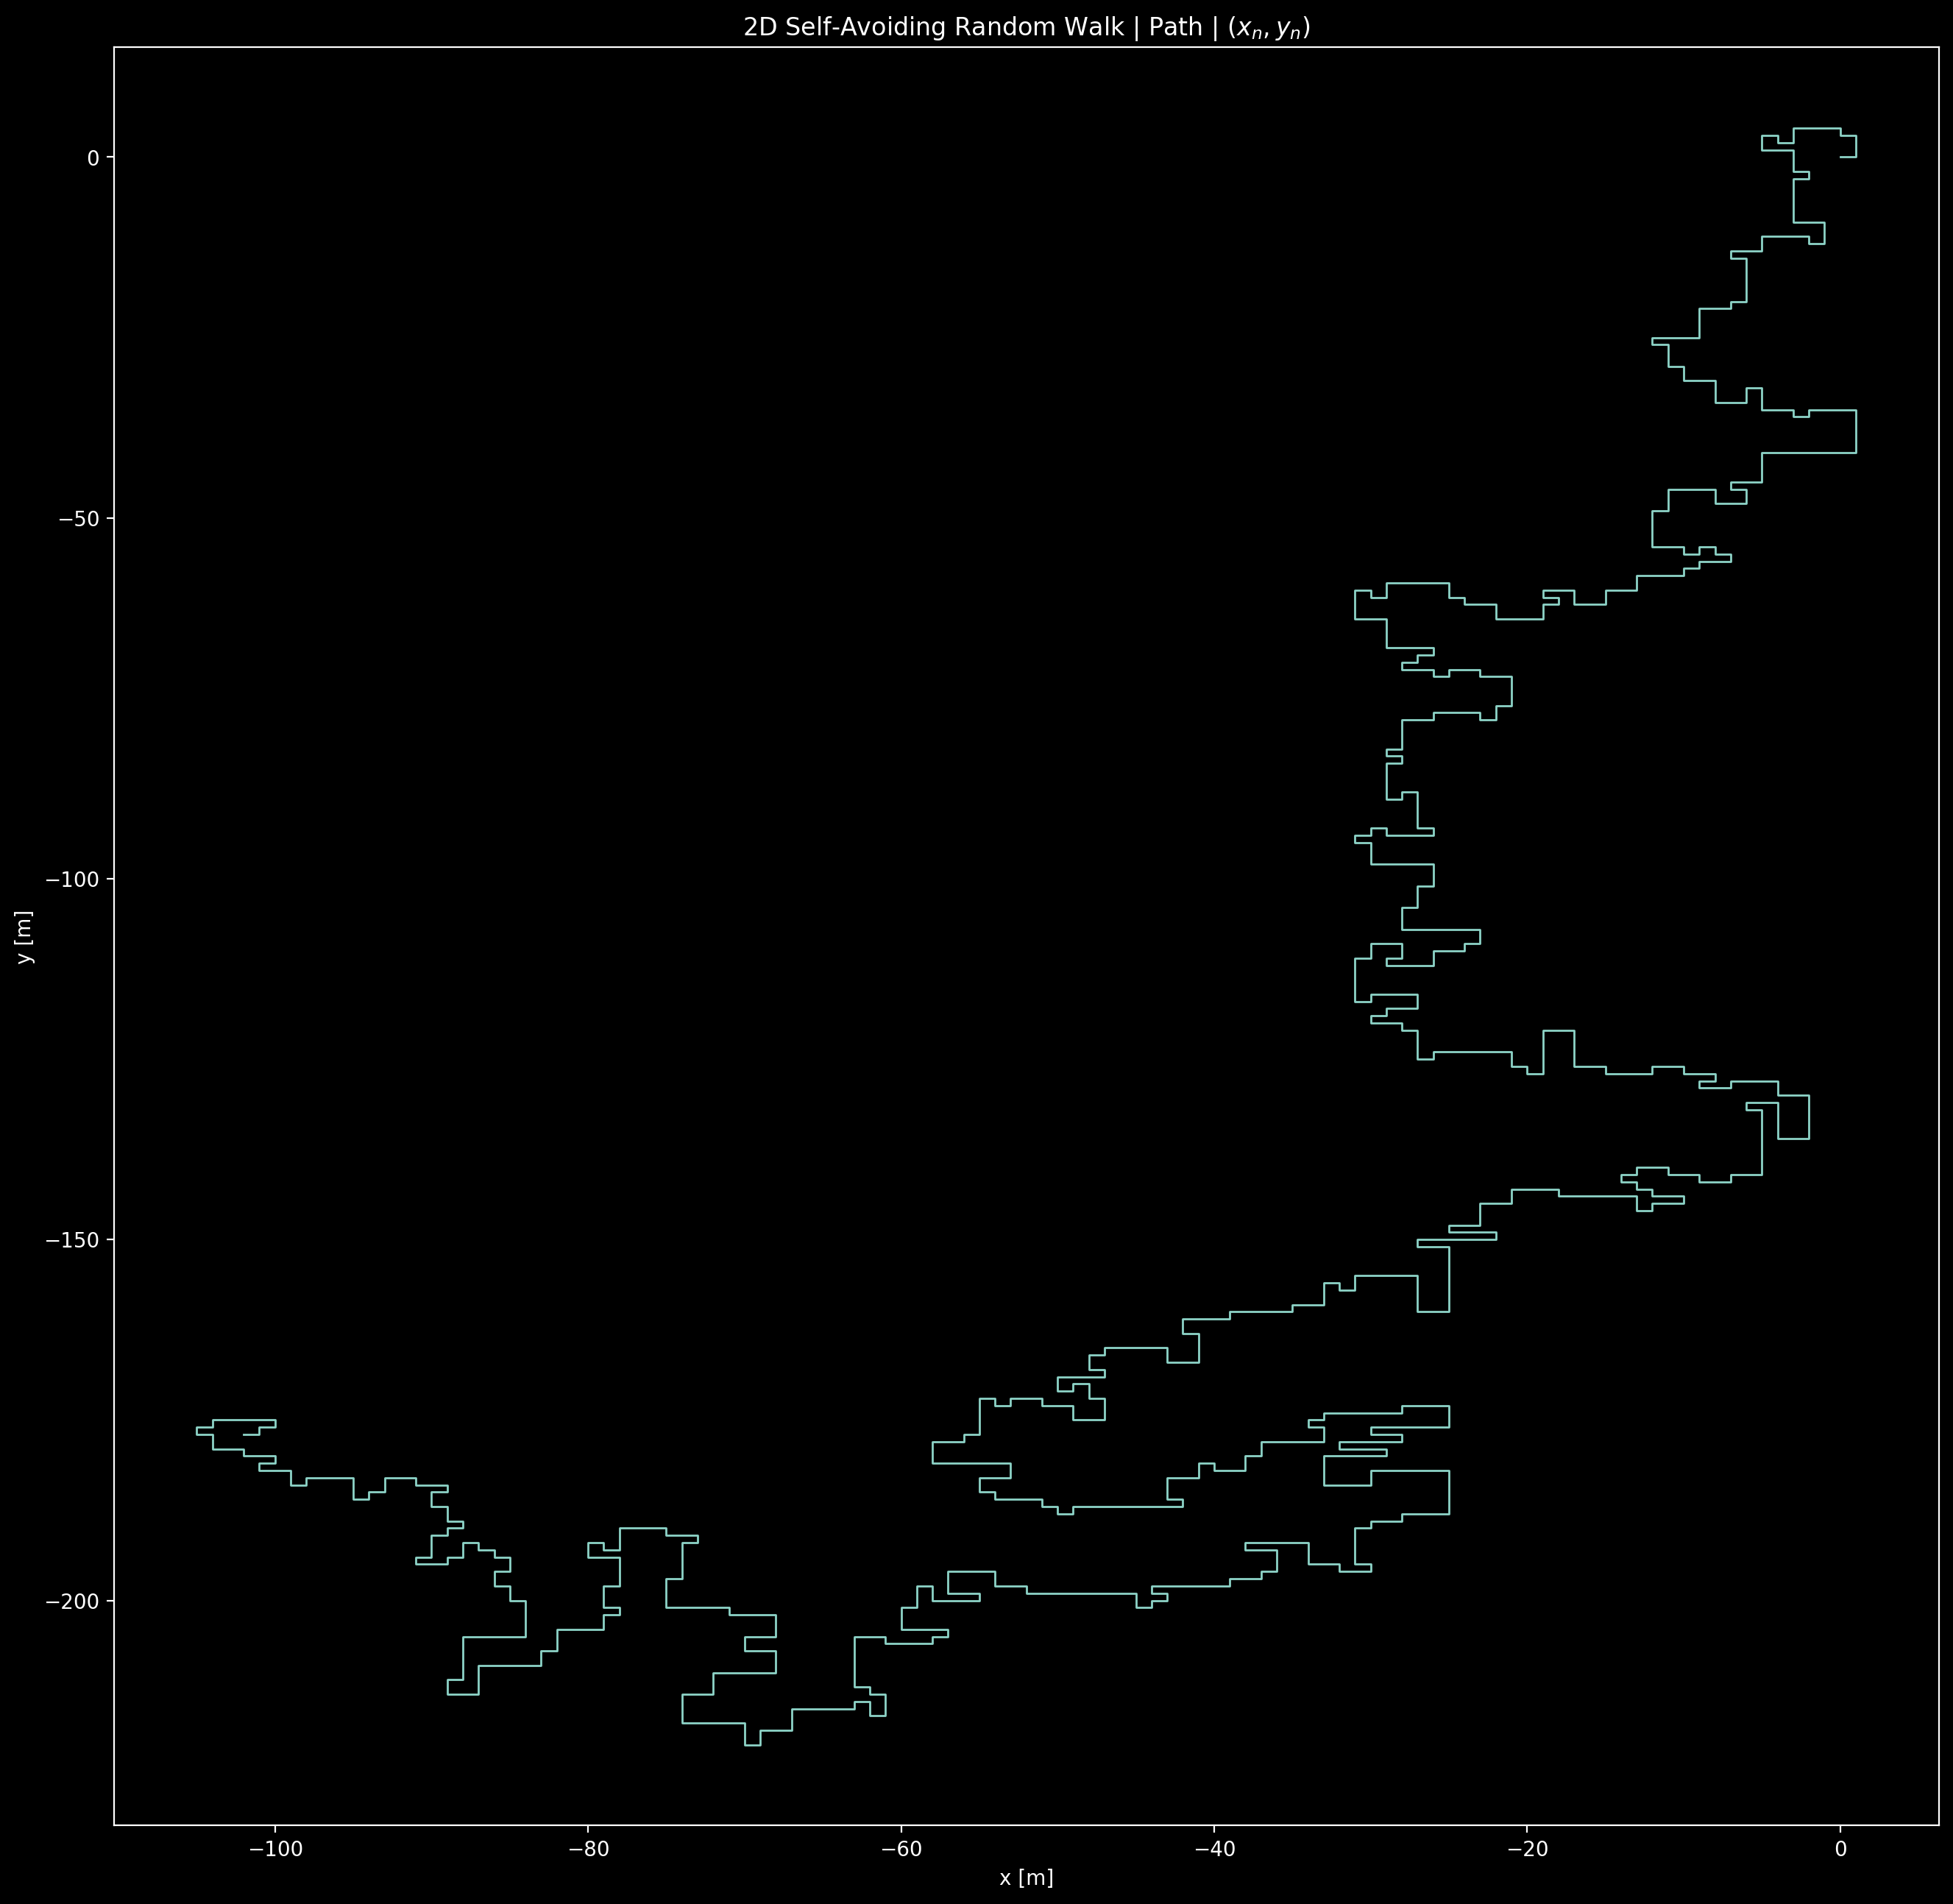

In [64]:
fig, ax = plt.subplots(1,1,figsize=(16,16), dpi=200)
ax.set_title(r"2D Self-Avoiding Random Walk | Path | $\left(x_n,y_n\right)$")
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.plot(saw[:,0], saw[:,1], lw=1)
plt.savefig('plots/Problem_3a.png')

<!-- ### 2D Self-Avoiding Random Walk | Mean Radial Distance (Squared) | $\left<r^2_n\right>$ -->
### Mean Radial Distance (Squared) | $\left<r^2_n\right>$

In [65]:
ensemble_2 = SAW_diffusion()
mean_distances_2 = np.apply_along_axis(np.mean, 0, ensemble_2)

100%|██████████| 1000/1000 [03:50<00:00,  4.34it/s]


In [66]:
fit_func = lambda x, c, v : c * np.power(x, 2 * v)
fit_x = range(mean_distances_2.size)
(c, v), _ = curve_fit(fit_func, fit_x, mean_distances_2)
display(Math(fr'\text{{Flory Exponent }}(\nu)\approx{v:0.6f}')) 

<IPython.core.display.Math object>

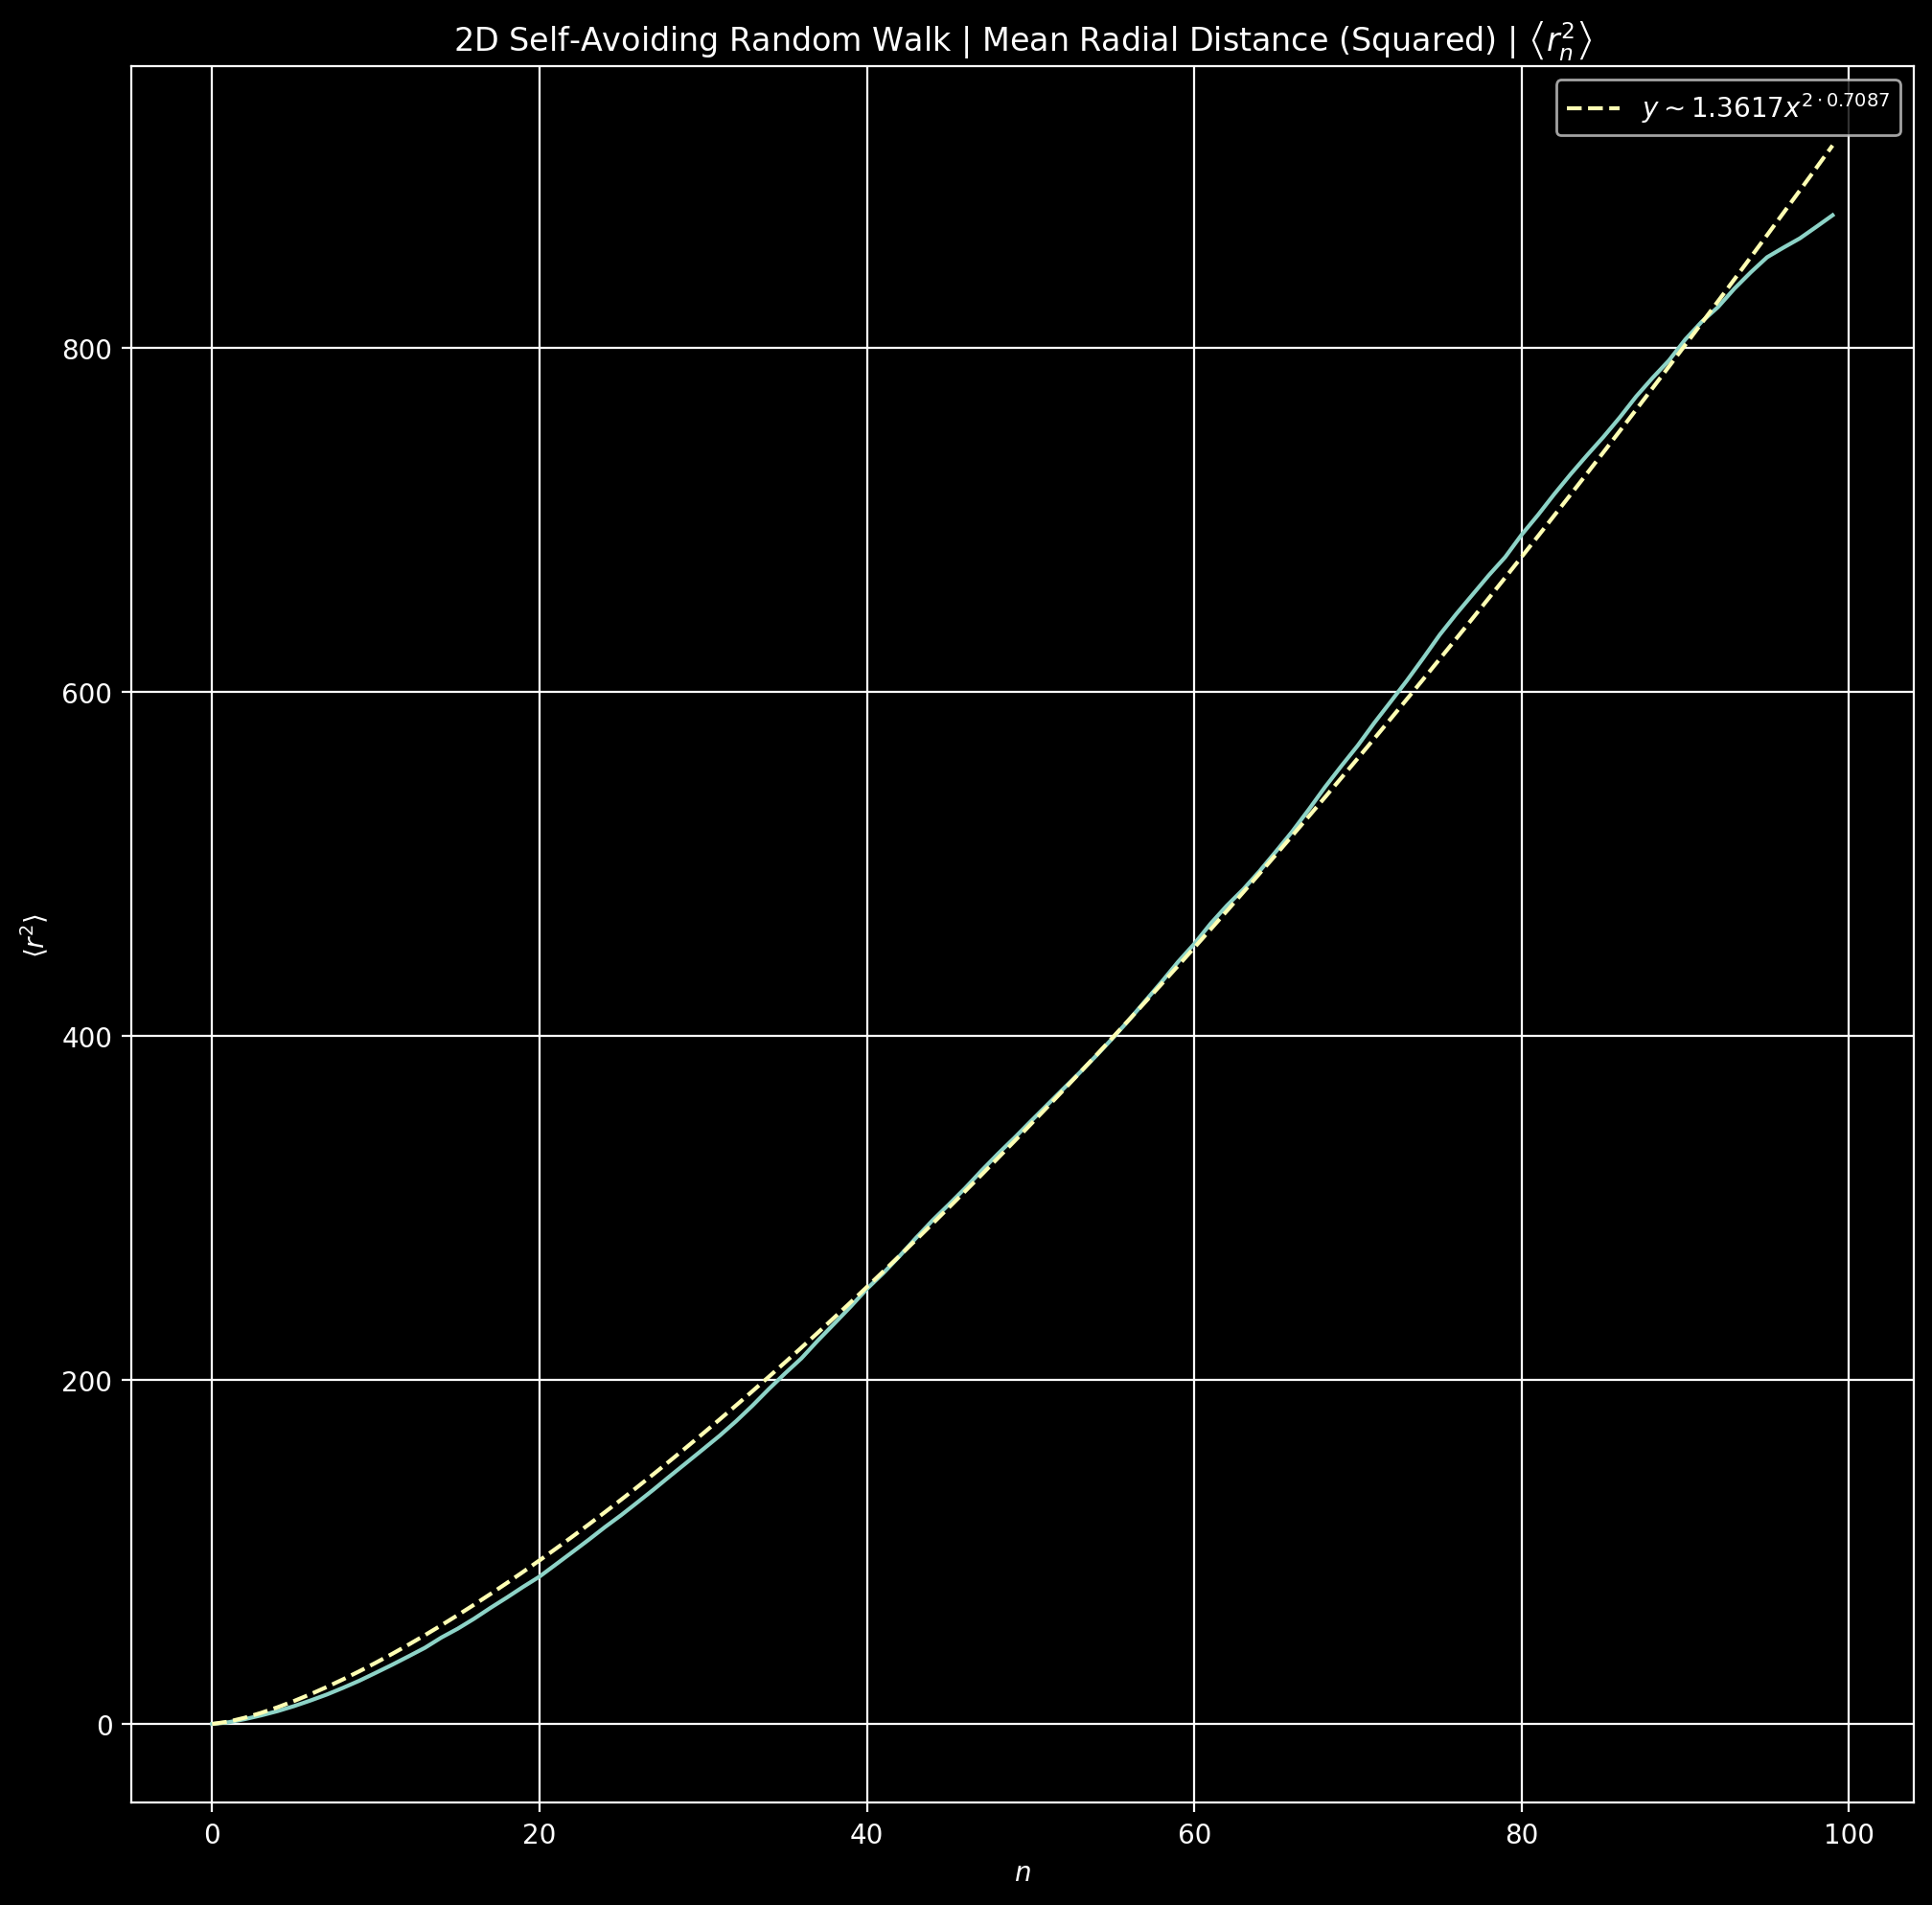

In [67]:
fig, ax = plt.subplots(1,1,figsize=(12,12), dpi=200)
ax.plot(mean_distances_2)
ax.plot(fit_x, fit_func(fit_x, c, v), ls='--', label=fr'$y\sim{c:0.4f}x^{{2\cdot{v:0.4f}}}$')
ax.set_title(r'2D Self-Avoiding Random Walk | Mean Radial Distance (Squared) | $\left<r^2_n\right>$')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\left<r^2\right>$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem_3b.png')

<!-- ### 2D Self-Avoiding Random Walk | Mean Squared Radial Distance (Squared) | $\left<\left(r^2_n\right)^2\right>$ -->
### Mean Squared Radial Distance (Squared) | $\left<\left(r^2_n\right)^2\right>$

In [68]:
ensemble_4 = SAW_diffusion(func=lambda _ : np.power(_, 2))
mean_distances_4 = np.apply_along_axis(np.mean, 0, ensemble_4)

100%|██████████| 1000/1000 [03:48<00:00,  4.37it/s]


<!-- ### 2D Self-Avoiding Random Walk | Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$ -->
### Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$

In [69]:
sigma_distances_2 = np.sqrt(mean_distances_4 - np.power(mean_distances_2, 2))
intermediate_difference = mean_distances_4 - np.power(mean_distances_2, 2)
positive_idx = np.argwhere(intermediate_difference >= 0.0).flatten()
sigma_distances_2 = sigma_distances_2[positive_idx]

In [70]:
fit_func = lambda x, c, v : c * x ** (2 * v)
fit_x = positive_idx
(c, v), _ = curve_fit(fit_func, fit_x, sigma_distances_2)

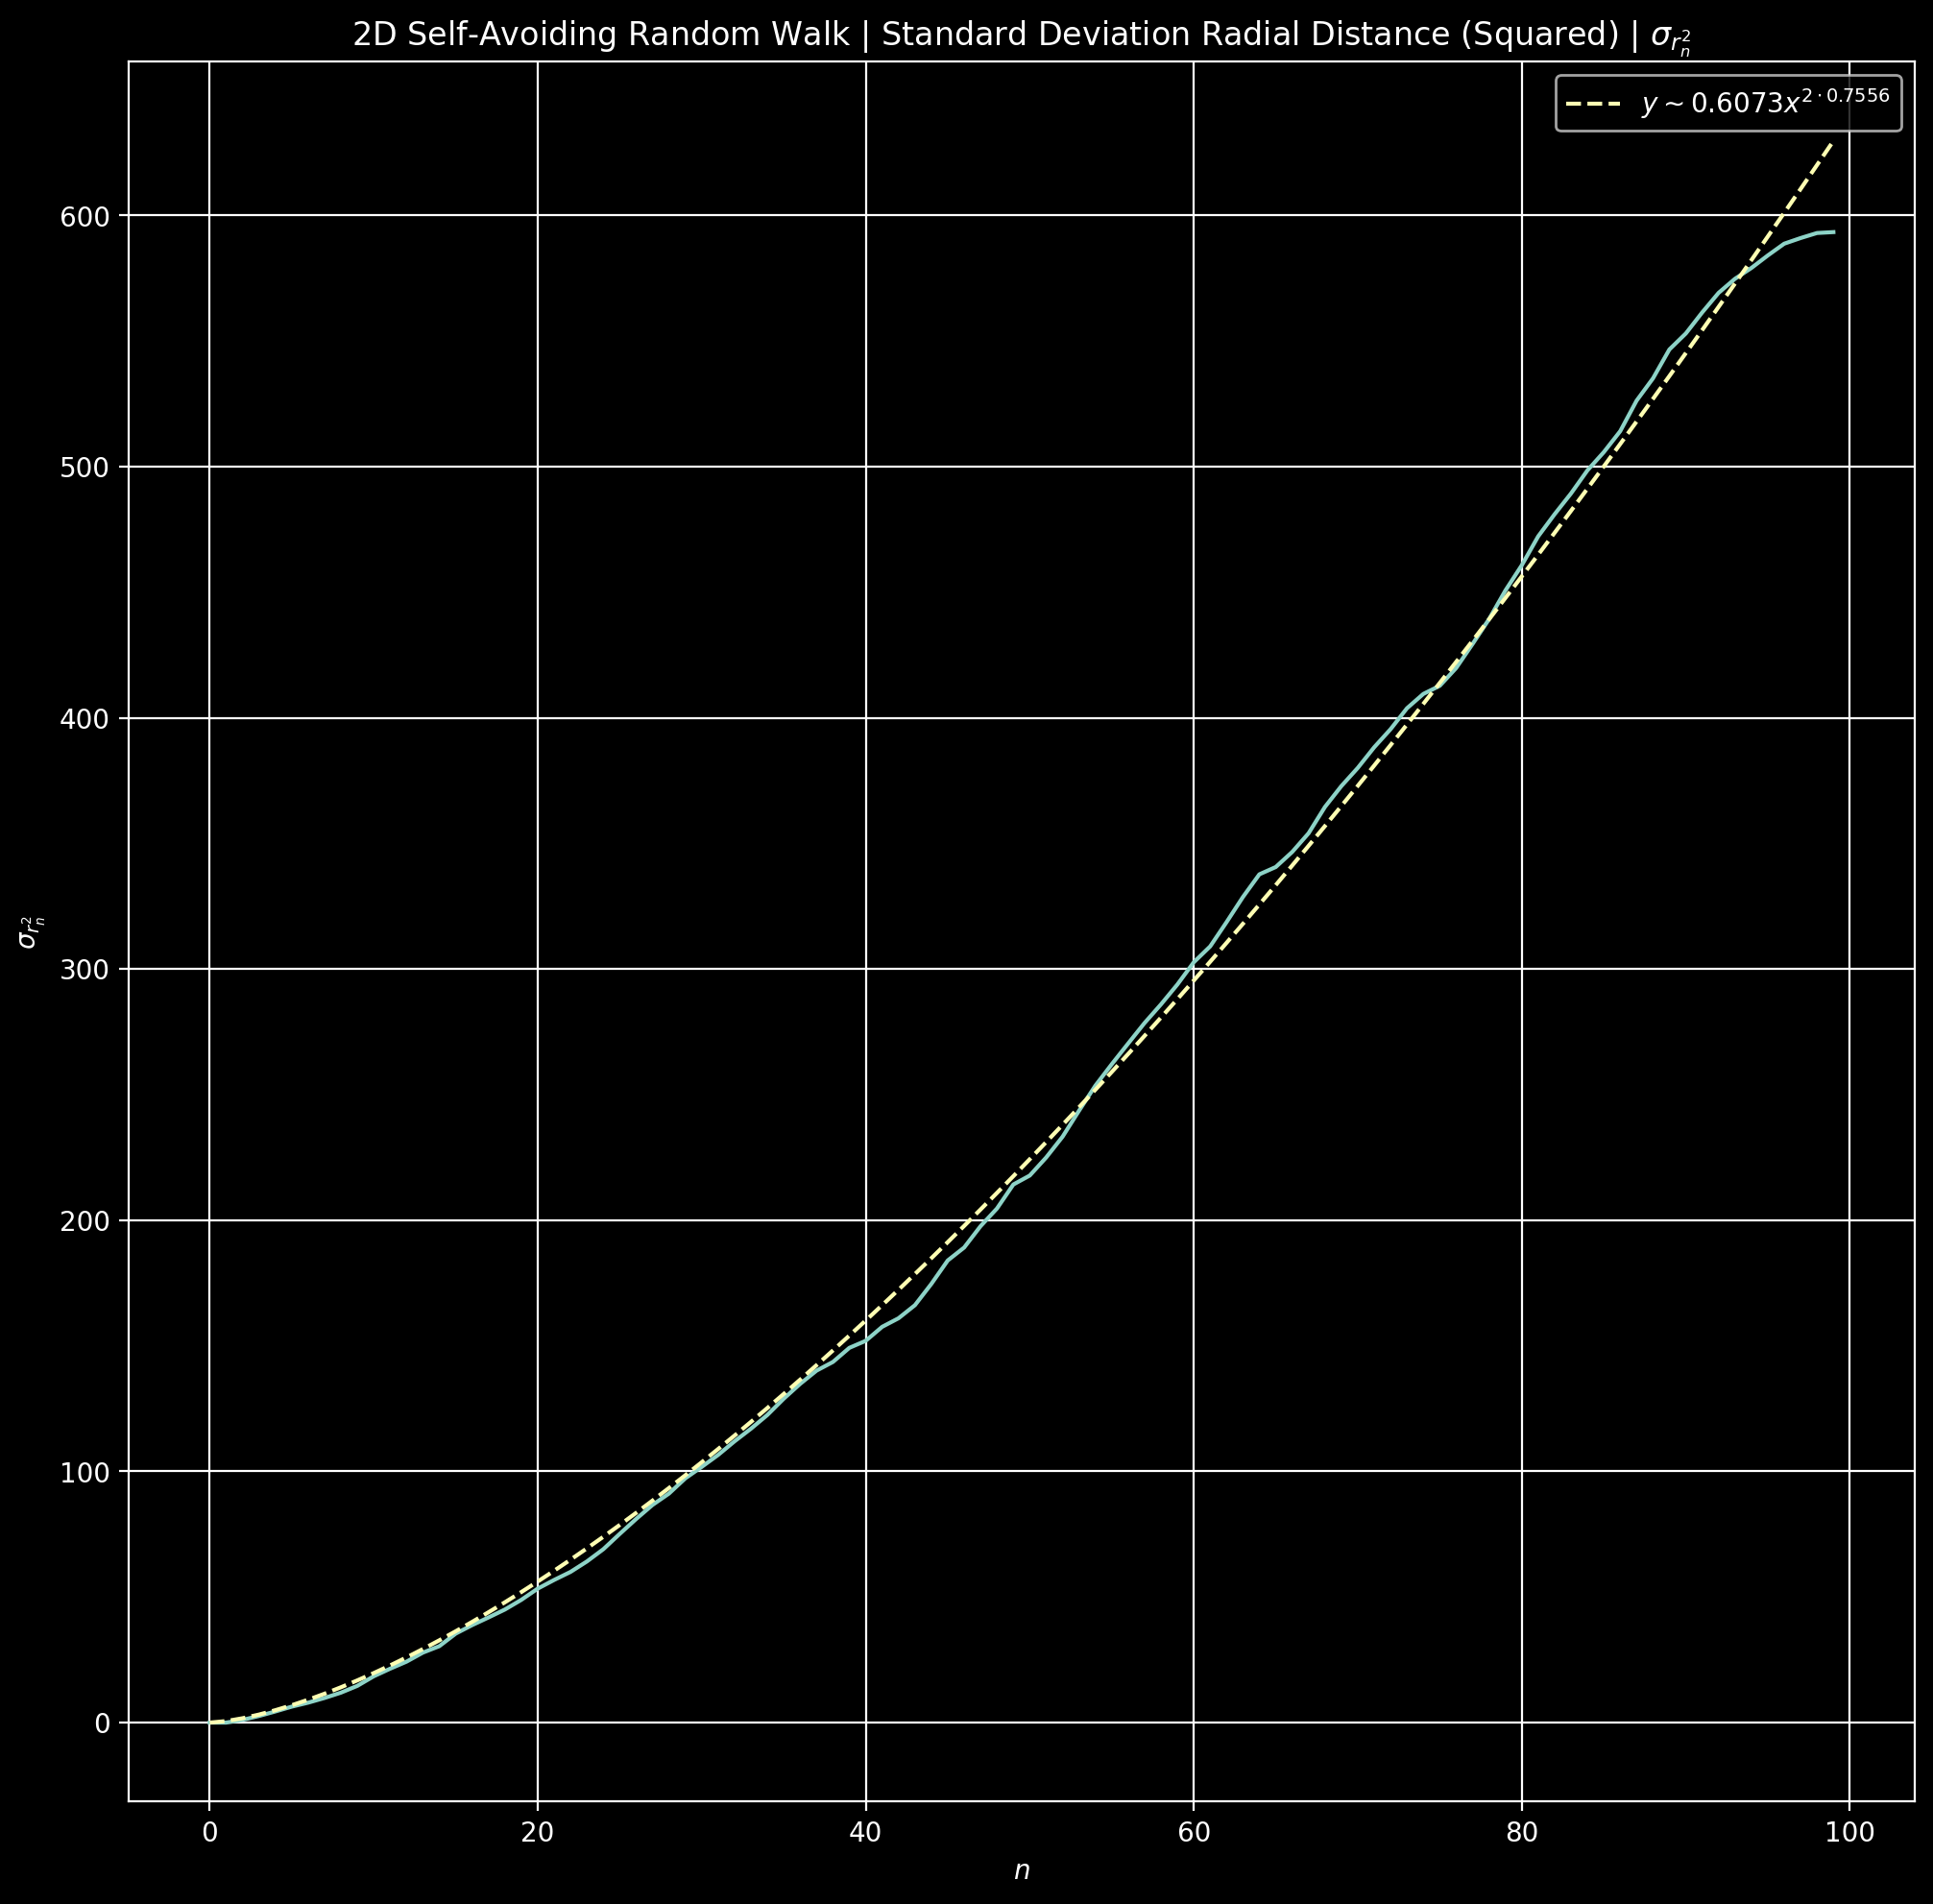

In [71]:
fig, ax = plt.subplots(1,1,figsize=(12,12), dpi=200)
ax.plot(sigma_distances_2)
ax.plot(fit_x, fit_func(fit_x, c, v), ls='--', label=fr'$y\sim{c:0.4f}x^{{2\cdot{v:0.4f}}}$')
ax.set_title(r'2D Self-Avoiding Random Walk | Standard Deviation Radial Distance (Squared) | $\sigma_{r^2_n}$')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\sigma_{r^2_n}$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem_3c.png')